# United States Delayed Flights Dataset Visualisation and Exploration
Udacity Data Analyst Nanodegree Project 5

## Table of Contents
- [1. Introduction](#1.)
- [2. Preliminary Data Wrangling](#2.)
- [3. Motivation for Visualisation](#3.)
- [4. Univariate Exploration](#4.)
    - [4.1. Main variable visualisation](#4.1.)
    - [4.2. Numeric Variables Univariate Exploration](#4.2.)
    - [4.3. Categorical Variables Univariate Exploration](#4.3.)
    - [4.4. Main causes of delay](#4.4.)
    - [4.5. Univariate Exploration Summary](#4.5.)
- [5. Bivariate Exploration](#5.)
    - [5.1. Relationships between numeric variables](#5.1.)
    - [5.2. Relationships between categorical variables](#5.2.)
    - [5.3. Relationship between numeric & categorical variables](#5.3.)
    - [5.4. Bivariate Exploration Summary](#5.4.)
- [6. Multivariate Exploration](#6.)
    
<a id='1.'></a>
## 1. Introduction
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary statistics and raw data regarding the number of on-time, delayed, cancelled and diverted flights appears in DOT's monthly [Air Travel Consumer Report](https://www.transportation.gov/individuals/aviation-consumer-protection/air-travel-consumer-reports) as well as in summary tables posted on their website. A flight is considered delayed when it arrived 15 or more minutes later than the schedule. Similarly, total delayed minutes are calculated only using the flights that meet this criteria. When multiple causes are assigned to one delayed flight, each cause is prorated based on the delayed minutes it is responsible for. These numbers are rounded and may do not add up to the total.

The data for this project originally comes from [RITA](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp) where it is described in detail. It is also one of Udacity's curated datasets and, among others, was recommended for this project. The dataset was manually downloaded from RITA's website in the form of a CSV file and contains data regarding flights in the United States, including carriers, flight delays, and reasons for these delays, from January 2010 to January 2021.

The dataset contains a separate entry for every airline-airport pair for every month and year between January 2010 to January 2021. More specifically, the dataset contains the following columns:

* **year**: the year of the entry
* **month**: the month of the entry
* **carrier**: abbreviated name of the airline
* **carrier_name**: full name of the airline
* **airport**: abbreviated name of the airport
* **airport_name**: full name of the airport
* **arr_flights**: total number of flights
* **arr_del15**: total number of delayed flights
* **carrier_ct**: number of flights delayed due to the airline itself
* **weather_ct**: number of flights delayed due to weather conditions
* **nas_ct**: number of flights delayed due to National Aviation System
* **security_ct**: number of flights delayed due to security issues
* **late_aircraft_ct**: number of flights delayed due to the aircraft arriving late in the departure airport
* **arr_cancelled**: total number of cancelled flights
* **arr_diverted**: total number of diverted flights
* **arr_delay**: total delayed minutes of the delayed flights
* **carrier_delay**: delayed minutes due to the airline itself
* **weather_delay**: delayed minutes due to weather conditions
* **nas_delay**: delayed minutes due to National Aviation System
* **security_delay**: delayed minutes due to security issues
* **late_aircraft_delay**: delayed minutes due to aircraft arriving late in the departure airport


<a id='2.'></a>
## 2. Preliminary Data Wrangling

This is a data visualisation project. Therefore, this project is primarily concerned with visualising the data and not data wrangling. However, in order to facilitate and ease the process of visualisation of this dataset, preliminary wrangling was carried out in this section.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

# pandas settings to view all columns
pd.set_option('display.max_columns', None)

# ignore the warnings in jupyter notebook
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('flights_delay.csv')

In [3]:
# overall high-level overview of data
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2010,1,9E,Pinnacle Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",65.0,16.0,5.44,0.00,10.56,0.0,0.00,1.0,0.0,765.0,440.0,0.0,325.0,0.0,0.0,NaN
1,2010,1,9E,Pinnacle Airlines Inc.,AEX,"Alexandria, LA: Alexandria International",60.0,17.0,4.81,0.49,7.89,0.0,3.81,4.0,0.0,1029.0,297.0,99.0,335.0,0.0,298.0,NaN
2,2010,1,9E,Pinnacle Airlines Inc.,ALB,"Albany, NY: Albany International",81.0,34.0,9.73,1.42,19.57,0.0,3.28,1.0,1.0,1535.0,533.0,77.0,700.0,0.0,225.0,NaN
3,2010,1,9E,Pinnacle Airlines Inc.,ALO,"Waterloo, IA: Waterloo Regional",3.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,16.0,0.0,0.0,16.0,0.0,0.0,NaN
4,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,156.06,0.0,62.78,46.0,4.0,15932.0,4225.0,1098.0,6092.0,0.0,4517.0,NaN


In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.sample(5))

(177483, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object
        year   month carrier            carrier_name airport  \
61227   2020       4      G4           Allegiant Air     MEM   
123625  2015      10      UA   United Air Lines Inc.     IAH   
23524   2019       9      UA   United Air Lines Inc.     MSP   
173232  2018       8      G4       

In [5]:
# columns overview
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

**Columns names are confusing and should be renamed for easier understanding. Similarly, the unnamed column should be dropped.**

In [6]:
df.rename(columns={' month' : 'month',
                   'carrier' : 'carrier_abb',
                   'airport' : 'airport_abb',
                   'arr_flights' : 'total_flights',
                   'arr_del15' : 'num_delayed_flights',
                   'carrier_ct' : 'num_carrier_delay', 
                   ' weather_ct' : 'num_weather_delay',
                   'nas_ct' : 'num_nas_delay', 
                   'security_ct' : 'num_security_delay', 
                   'late_aircraft_ct' : 'num_late_aircraft_delay',
                   'arr_cancelled' : 'num_cancelled_flights',
                   'arr_diverted' : 'num_diverted_flights',
                   ' arr_delay' : 'total_mins_delay', 
                   ' carrier_delay' : 'mins_carrier_delay', 
                   'weather_delay' : 'mins_weather_delay', 
                   'nas_delay' : 'min_nas_delay',
                   'security_delay' : 'mins_security_delay',  
                   'late_aircraft_delay' : 'mins_late_aircraft_delay'}, inplace=True)

In [7]:
df.drop(['Unnamed: 21'], axis=1, inplace=True)

**While there is an airport column specifying the destination airport, a more broad destination (i.e. a US state or territory) should be added.**

In [8]:
df['destination_abb'] = df.airport_name.str.extract('(\s[A-Z][A-Z]:)', expand=True)
df['destination_abb'] = df['destination_abb'].str[1:-1]

**Note**: The dictionary below was built from a list of US states, territories and their abbreviations found on [wikipedia.](https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations)

In [9]:
# List of U.S. state and territory abbreviations
destinations = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas",
          "CA":"California","CO":"Colorado","CT":"Connecticut", "DC" : "Washington DC",
          "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii",
          "ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa",
          "KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine",
          "MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota",
          "MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska",
          "NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico",
          "NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio",
          "OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island", "PR":"Puerto rico",
          "SC":"South Carolina","SD":"South Dakota","TN":"Tennessee", "TT": "Trust Territory of the Pacific Islands", "TX":"Texas",
          "UT":"Utah","VT":"Vermont","VA":"Virginia", "VI": "Virgin islands", "WA":"Washington",
          "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}

In [10]:
destination = []
for index, row in df.iterrows():
    destination.append(destinations[row['destination_abb']])

In [11]:
df['destination_name'] = destination

**The months in the month column should be changed to their names instead of numbers in order to make the visualisations clearer.**

In [12]:
months = {1:'January',
         2:'February',
         3:'March',
         4:'April',
         5:'May',
         6:'June',
         7:'July',
         8:'August',
         9:'September',
         10:'October',
         11:'November',
         12:'December'}

In [13]:
month = []
for index, row in df.iterrows():
    month.append(months[row['month']])

In [14]:
df['month'] = month

**An additional date column should be added to clearly state the time of the entry. Since every entry is for a moth, the date will only contain the year and month.**

In [15]:
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'], format='%Y%B').dt.to_period('M')

**To better understand the delay pattern in the dataset, a column for the biggest delay cause and the biggest minutes delay for every entry should be added.**

In [16]:
biggest_delay_cause = []
for index, row in df.iterrows():
    d = dict()
    if row['num_carrier_delay'] != 0:
        d['Carrier'] = row['num_carrier_delay']
    if row['num_weather_delay'] != 0:
        d['Weather'] = row['num_weather_delay']
    if row['num_nas_delay'] != 0:
        d['NAS'] = row['num_nas_delay']
    if row['num_security_delay'] != 0:
        d['Security'] = row['num_security_delay']
    if row['num_late_aircraft_delay'] != 0:
        d['Late Aircraft'] = row['num_late_aircraft_delay']
    try:
        max_cause = max(d)
    except:
        # In case none of the predictions are dog breeds
        max_cause = np.nan
    biggest_delay_cause.append(max_cause)

df['biggest_delay_cause'] = biggest_delay_cause

In [17]:
biggest_mins_delay = []
for index, row in df.iterrows():
    d = dict()
    if row['mins_carrier_delay'] != 0:
        d['Carrier'] = row['mins_carrier_delay']
    if row['mins_weather_delay'] != 0:
        d['Weather'] = row['mins_weather_delay']
    if row['min_nas_delay'] != 0:
        d['NAS'] = row['min_nas_delay']
    if row['mins_security_delay'] != 0:
        d['Security'] = row['mins_security_delay']
    if row['mins_late_aircraft_delay'] != 0:
        d['Late Aircraft'] = row['mins_late_aircraft_delay']
    try:
        max_cause = max(d)
    except:
        # In case none of the predictions are dog breeds
        max_cause = np.nan
    biggest_mins_delay.append(max_cause)

df['biggest_mins_delay'] = biggest_mins_delay

**Rearranging the columns within the dataframe.**

In [18]:
df.columns

Index(['year', 'month', 'carrier_abb', 'carrier_name', 'airport_abb',
       'airport_name', 'total_flights', 'num_delayed_flights',
       'num_carrier_delay', 'num_weather_delay', 'num_nas_delay',
       'num_security_delay', 'num_late_aircraft_delay',
       'num_cancelled_flights', 'num_diverted_flights', 'total_mins_delay',
       'mins_carrier_delay', 'mins_weather_delay', 'min_nas_delay',
       'mins_security_delay', 'mins_late_aircraft_delay', 'destination_abb',
       'destination_name', 'date', 'biggest_delay_cause',
       'biggest_mins_delay'],
      dtype='object')

In [19]:
df = df[['date', 'year', 'month', 'carrier_abb', 'carrier_name', 'destination_abb',
         'destination_name', 'airport_abb', 'airport_name','total_flights',
         'num_cancelled_flights', 'num_diverted_flights','num_delayed_flights', 'biggest_delay_cause',
         'num_carrier_delay', 'num_weather_delay', 'num_nas_delay', 'num_security_delay', 
         'num_late_aircraft_delay', 'total_mins_delay', 'biggest_mins_delay', 'mins_carrier_delay', 
         'mins_weather_delay', 'min_nas_delay', 'mins_security_delay', 'mins_late_aircraft_delay']]

**Testing the changes outlined above.**

In [20]:
df.sample(5)

,date,year,month,carrier_abb,carrier_name,destination_abb,destination_name,airport_abb,airport_name,total_flights,num_cancelled_flights,num_diverted_flights,num_delayed_flights,biggest_delay_cause,num_carrier_delay,num_weather_delay,num_nas_delay,num_security_delay,num_late_aircraft_delay,total_mins_delay,biggest_mins_delay,mins_carrier_delay,mins_weather_delay,min_nas_delay,mins_security_delay,mins_late_aircraft_delay
160635,2015-12,2015,December,OO,SkyWest Airlines Inc.,UT,Utah,SLC,"Salt Lake City, UT: Salt Lake City International",4070.0,71.0,3.0,810.0,Weather,141.98,26.05,206.50,2.63,432.84,56078.0,Weather,17936.0,2932.0,6904.0,80.0,28226.0
153983,2018-02,2018,February,G4,Allegiant Air,WA,Washington,PSC,"Pasco/Kennewick/Richland, WA: Tri Cities",16.0,0.0,0.0,3.0,Late Aircraft,1.07,0.00,0.00,0.00,1.93,334.0,Late Aircraft,155.0,0.0,0.0,0.0,179.0
109234,2015-05,2015,May,OO,SkyWest Airlines Inc.,NV,Nevada,EKO,"Elko, NV: Elko Regional",57.0,0.0,0.0,7.0,NAS,3.71,0.00,2.39,0.00,0.90,400.0,NAS,309.0,0.0,64.0,0.0,27.0
157391,2019-08,2019,August,EV,ExpressJet Airlines LLC,CO,Colorado,COS,"Colorado Springs, CO: City of Colorado Springs...",16.0,0.0,0.0,1.0,NAS,0.00,0.00,1.00,0.00,0.00,15.0,NAS,0.0,0.0,15.0,0.0,0.0
42356,2018-12,2018,December,AA,American Airlines Inc.,VA,Virginia,ORF,"Norfolk, VA: Norfolk International",168.0,7.0,0.0,32.0,Weather,11.85,1.55,8.20,0.00,10.39,1603.0,Weather,625.0,192.0,320.0,0.0,466.0


**Saving a clean version of the dataframe as a CSV for use in part 2.**

In [21]:
df.to_csv('flights_delay_clean.csv', encoding='utf-8', index=False)

<a id='3.'></a>
## 3. Motivation for Visualisation

### The structure of the dataset

There are 177,483 entries in the dataset. Each entry records flights of a specified airline to a specified airport during a specified month and year. Each entry provides the breakdown of causes of delayed flights in terms of the total number of flights and total delayed minutes. Excluding destination, carrier and airport names columns, which are categorical variables and are stored as strings, all other columns contain numeric values and are stored as floats. 

### Main features of interest

Since the causes of delays are already clearly stated in the dataset, I am most interested in finding out what influences the total delayed minutes for every entry. My secondary objectives are: finding out how the most common delay causes are distributed and how the total delayed minutes changed in 2020 due to the pandemic.

**Note**: Only the findings for the primary investigation objective, what influences the total delayed minutes, will be mentioned in the presentation (part 2 of this project).

### Important features of the dataset to be used for investigation

I believe that the main variables influencing the delayed minutes are the number of flights arriving and the number of delayed flights in every entry. Thus, I believe that these variables will be highly correlated with each other. Furthermore, I also believe that the categorical variables of year, month, destination, and the carrier will also affect the total delayed minutes.

Therefore, the predictor variables to be investigated are as follows:

**Numerical variables**
1. Total number of flights arriving
2. Number of delayed flights

**Categorical variables**
1. Year
2. Month
3. Destination
4. Carrier

<a id='4.'></a>
## 4. Univariate Exploration

This section individually visualises the variables of interest outlined above.

<a id='4.1.'></a>
### 4.1. Main variable visualisation
First, the distribution of the main variable, total minutes delay, is examined (`total_mins_delay`).

In [22]:
df.total_mins_delay.describe()

count    177230.000000
mean       4091.002550
std       11858.043237
min           0.000000
25%         366.000000
50%        1071.000000
75%        2927.000000
max      429194.000000
Name: total_mins_delay, dtype: float64

In [23]:
np.log10(df['total_mins_delay'].describe())

count    5.248537
mean     3.611830
std      4.074013
min          -inf
25%      2.563481
50%      3.029789
75%      3.466423
max      5.632654
Name: total_mins_delay, dtype: float64

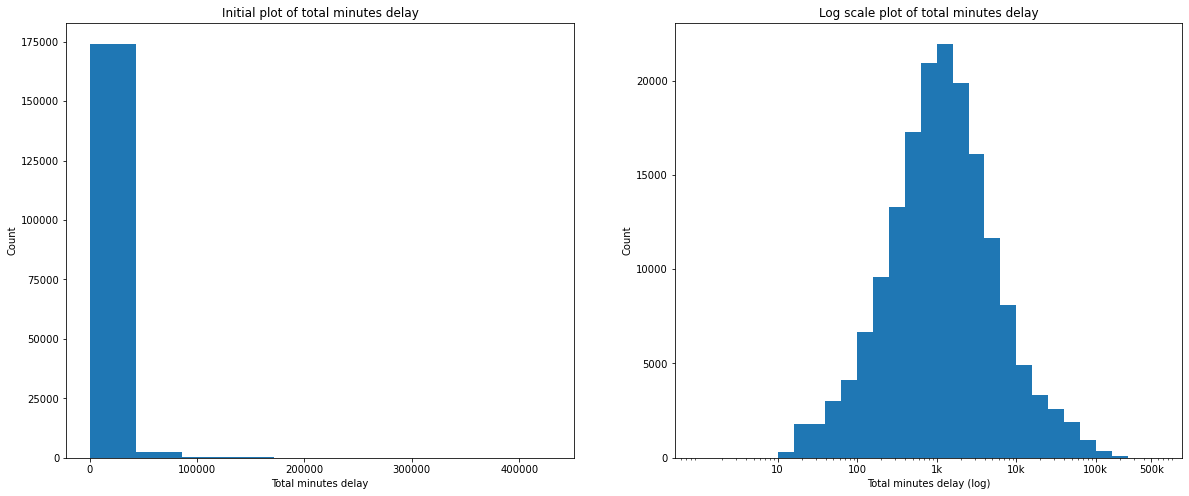

In [24]:
plt.figure(figsize = [20, 8])

# HISTOGRAM ON LEFT: total minutes delay distribution without scaling
plt.subplot(1, 2, 1)
plt.hist(data=df, x='total_mins_delay');
plt.ylabel('Count')
plt.xlabel('Total minutes delay')
plt.title('Initial plot of total minutes delay')

# HISTOGRAM ON RIGHT: total minutes delay distirbution on a log scale
plt.subplot(1, 2, 2)

bins = 10 ** np.arange(0, 5.63+0.2, 0.2)
plt.hist(data=df, x='total_mins_delay', bins=bins);
plt.xscale('log')
plt.ylabel('Count')
plt.xlabel('Total minutes delay (log)')
plt.xticks([10, 10e1, 10e2, 10e3, 10e4, 50e4], [10, 100, '1k', '10k', '100k', '500k'])
plt.title('Log scale plot of total minutes delay');

Total minutes delay data is significantly skewed to the right, and therefore a log scale was used to properly visualise the data. Total minutes delay in the dataset take on a very large range of values, where the vast majority of the entries are distributed between 0 and 100k total minutes delay. Most entries have less than 10k total delayed minutes; however, some entries have even more than 400k total delayed minutes. Interestingly, despite the mentioned skewness, the log scale graph shows that the data resembles a normal distribution.

<a id='4.2.'></a>
### 4.2. Numeric Variables Univariate Exploration

Numeric variables of most interest are the total number of flights arriving and the total number of delayed flights per entry. These variables are given by `total_flights` and `num_delayed_flights` columns.

#### 4.2.1 Total number of flights arriving

In [25]:
df.total_flights.describe()

count    177230.000000
mean        381.527258
std        1021.846311
min           1.000000
25%          55.000000
50%         115.000000
75%         272.000000
max       21977.000000
Name: total_flights, dtype: float64

In [26]:
np.log10(df['total_flights'].describe())

count    5.248537
mean     2.581526
std      3.009386
min      0.000000
25%      1.740363
50%      2.060698
75%      2.434569
max      4.341968
Name: total_flights, dtype: float64

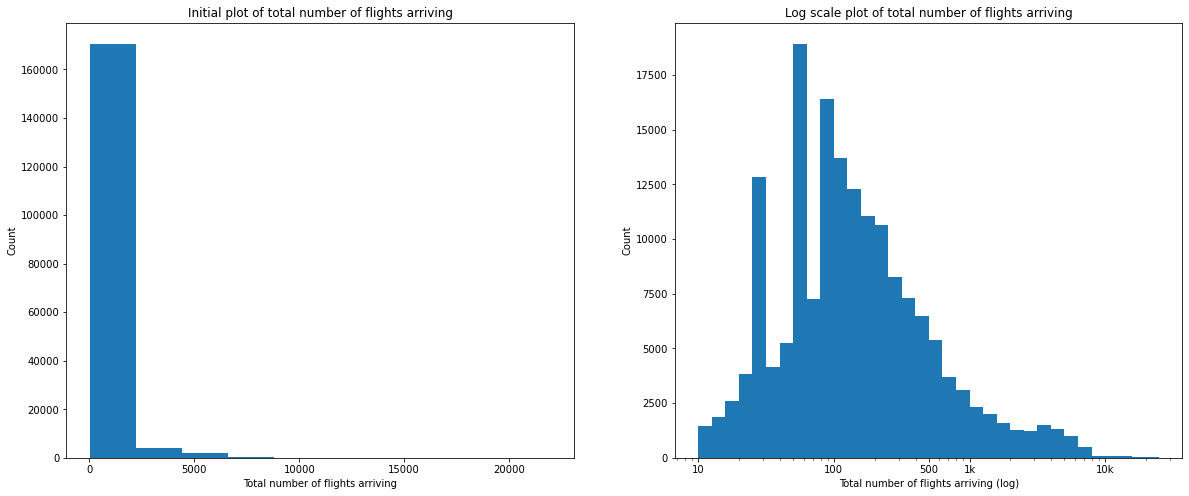

In [27]:
plt.figure(figsize = [20, 8])

# HISTOGRAM ON LEFT: total flights distribution without scaling
plt.subplot(1, 2, 1)
plt.hist(data=df, x='total_flights');
plt.ylabel('Count')
plt.xlabel('Total number of flights arriving')
plt.title('Initial plot of total number of flights arriving')

# HISTOGRAM ON RIGHT: total flights distirbution on a log scale
plt.subplot(1, 2, 2)

bins = 10 ** np.arange(1, 4.34+0.1, 0.1)
plt.hist(data=df, x='total_flights', bins=bins);
plt.xscale('log')
plt.ylabel('Count')
plt.xlabel('Total number of flights arriving (log)')
plt.xticks([10, 10e1, 5e2, 10e2, 10e3], [10, 100, 500, '1k','10k'])
plt.title('Log scale plot of total number of flights arriving');

Similar to the main variable, the total number of flights arriving is skewed to the right where the entries are mostly distributed between 1 and 2,500 and hence, a log scale was used again. The log graph shows 3 spikes within the 10 to 100 region. The first spike is around 30 total flights arriving and has more than 12,500 entries. The second spike is around 60 total flights arriving and has more than 17,500 entries which is significantly higher count than any other number. The last spike is around 90 total flights arriving and has more than 15,000 entries. Nevertheless, the log scale graph still shows that the data is skewed to the right. It also illustrates outliers as some entries have more than 10k flights. Nevertheless, if these anomalies are disregarded, the data could be seen as normally distributed where the majority of the entries are between 10 and 1k total arriving flights.

#### 4.2.2. Number of delayed flights 

In [28]:
df.num_delayed_flights.describe()

count    177027.000000
mean         68.213979
std         180.665161
min           0.000000
25%           7.000000
50%          19.000000
75%          51.000000
max        5268.000000
Name: num_delayed_flights, dtype: float64

In [29]:
np.log10(df['num_delayed_flights'].describe())

count    5.248040
mean     1.833873
std      2.256874
min          -inf
25%      0.845098
50%      1.278754
75%      1.707570
max      3.721646
Name: num_delayed_flights, dtype: float64

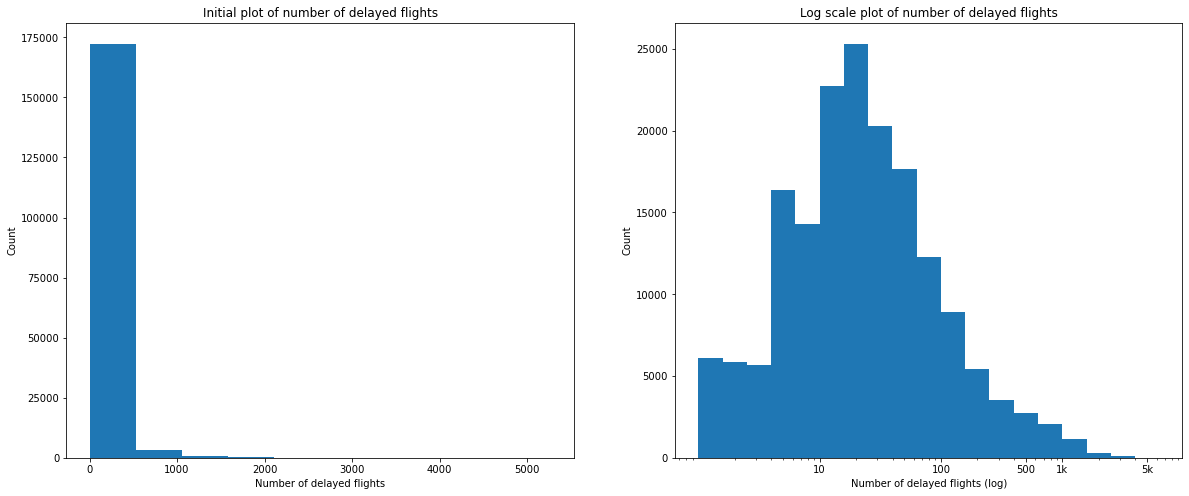

In [30]:
plt.figure(figsize = [20, 8])

# HISTOGRAM ON LEFT: variable distribution without scaling
plt.subplot(1, 2, 1)
plt.hist(data=df, x='num_delayed_flights');
plt.ylabel('Count')
plt.xlabel('Number of delayed flights')
plt.title('Initial plot of number of delayed flights')

# HISTOGRAM ON RIGHT: variable distirbution on a log scale
plt.subplot(1, 2, 2)

bins = 10 ** np.arange(0, 3.72+0.2, 0.2)
plt.hist(data=df, x='num_delayed_flights', bins=bins);
plt.xscale('log')
plt.ylabel('Count')
plt.xlabel('Number of delayed flights (log)')
plt.xticks([10, 10e1, 5e2, 10e2, 5e3], [10, 100, 500, '1k','5k'])
plt.title('Log scale plot of number of delayed flights');

Just like with the previous two variables, a log scale plot was needed to visualise the distribution of this variable. From the log scale plot, it could be seen that most of the entries for total delayed flights fall between 10 and 500. Furthermore, the log scale plot also shows that there are a significant amount of entries having less than 10 delayed flights. While there are not enough entries in that region to suggest that there is a bimodal distribution, the variable does not look like it follows a normal distribution when compared to the other two numeric variables.

<a id='4.3.'></a>
### 4.3. Categorical Variables Univariate Exploration
Categorical variables of most interest are year, month, destination and carrier. These variables are given by `year`, `month`, `destination_name` and `carrier_name` columns.

In [31]:
# setting a base colour for all visualisations
base_color = sb.color_palette()[0]

#### 4.3.1 Year

In [32]:
df.year.value_counts()

2019    20946
2018    20231
2020    18859
2010    17575
2013    16089
2011    15585
2012    14387
2014    13980
2015    13528
2017    12518
2016    12217
2021     1568
Name: year, dtype: int64

In [33]:
year_counts = df['year'].value_counts()
n_years = df['year'].value_counts().sum()
year_order = df['year'].value_counts().index

year_sort = list(df.year.unique())
year_sort.sort()

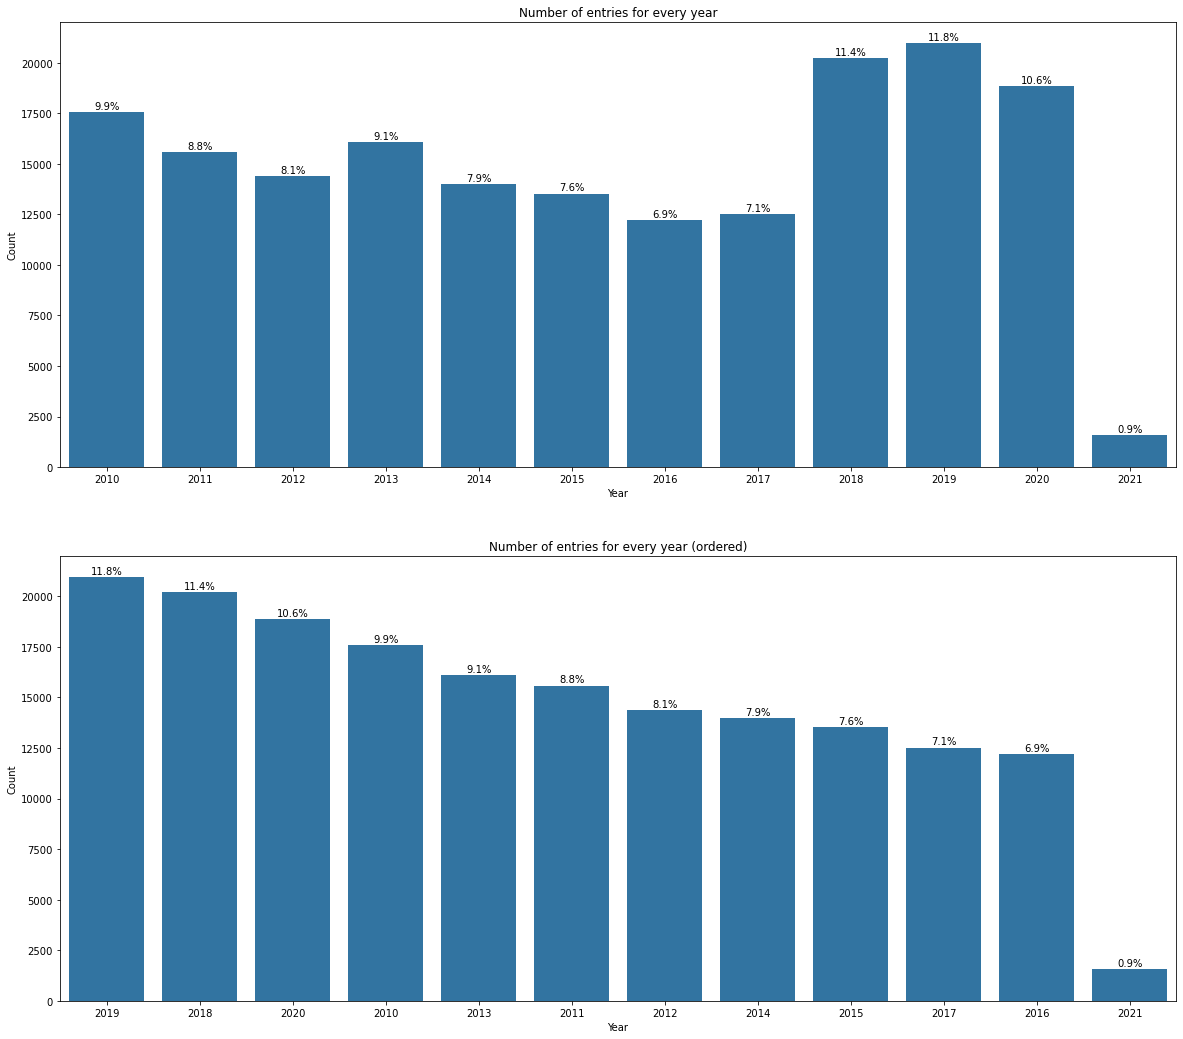

In [34]:
plt.figure(figsize = [20, 18]) 

# BAR CHART ON THE TOP: unordered years
plt.subplot(2, 1, 1)
sb.countplot(data=df, x='year', color=base_color, order=year_sort)

locs, labels = plt.xticks(rotation=90) 

for loc, label in zip(locs, labels):
    count = year_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_years)
    plt.text(loc, count+150, pct_string, ha = 'center', color = 'black')

plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of entries for every year');

# BAR CHART ON THE BOTTOM: ordered years
plt.subplot(2, 1, 2)
sb.countplot(data=df, x='year', color=base_color, order=year_order)

locs, labels = plt.xticks(rotation=90) 

for loc, label in zip(locs, labels):
    count = year_counts[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_years)
    plt.text(loc, count+150, pct_string, ha = 'center', color = 'black')

plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of entries for every year (ordered)');

The dataset contains entries for 12 different years. The least amount of entries are for the year 2021. This is to be expected as the dataset only contains the entries for January of 2021. Alternatively, 2019 and 2018 have the highest amount of entries, which are 11.8% and 11.4% of the total dataset, respectively. One could expect 2020 to have a significantly lower entry due to a decrease in flights as a result of the pandemic; however, interestingly, it is the third highest year by the number of entries, where 10.6% of all entries are for 2020. Otherwise, it could be said that the entries are distributed fairly proportionately, with every year having at least 15,000 entries.

#### 4.3.2 Month

In [35]:
df.month.value_counts()

January      16411
December     14820
March        14772
August       14723
April        14682
February     14667
June         14662
September    14633
November     14602
July         14567
October      14500
May          14444
Name: month, dtype: int64

In [36]:
month_counts = df['month'].value_counts()
n_months = df['month'].value_counts().sum()
months_sort = list(months.values())

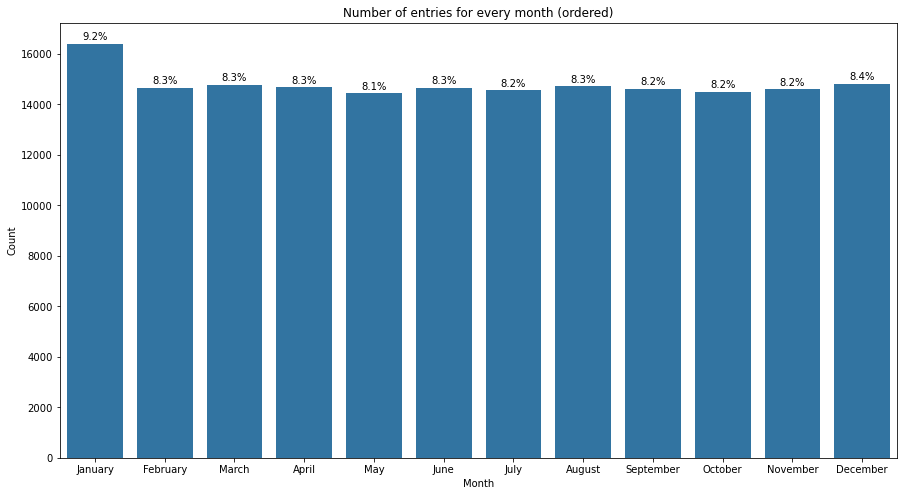

In [37]:
plt.figure(figsize = [15, 8]) 
sb.countplot(data=df, x='month', color=base_color, order=months_sort)

locs, labels = plt.xticks(rotation=90) 

for loc, label in zip(locs, labels):
    count = month_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_months)
    plt.text(loc, count+150, pct_string, ha = 'center', color = 'black')

plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('Number of entries for every month (ordered)');

The number of entries is almost perfectly evenly distributed among the 12 months, with the exception of January. This unbalance might be due to the fact that for the year 2021, there is only January data an no data for other months in that year. To investigate this, the dataset without January 2021 data will be examined.

In [38]:
month_counts2 = data=df[df['year']!=2021]['month'].value_counts()
n_months2 = df[df['year']!=2021]['month'].value_counts().sum()

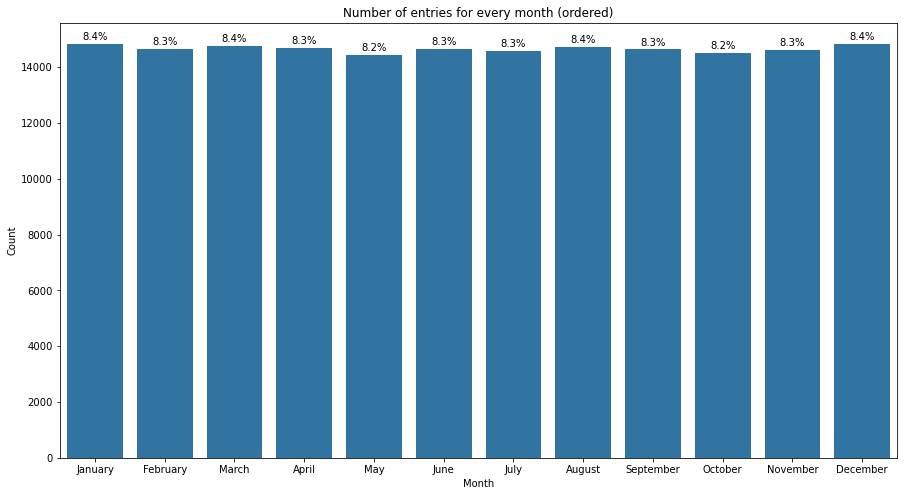

In [39]:
plt.figure(figsize = [15, 8]) 
sb.countplot(data=df[df['year']!=2021], x='month', color=base_color, order=months_sort)

locs, labels = plt.xticks(rotation=90) 

for loc, label in zip(locs, labels):
    count = month_counts2[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_months2)
    plt.text(loc, count+150, pct_string, ha = 'center', color = 'black')

plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('Number of entries for every month (ordered)');

The above bar chart shows the dataset with 2021 data removed and illustrates that entries are almost perfectly evenly distributed among the 12 months. Every month has more than 14,000 entries, and the entries for every month are usually around 8.3% of the whole dataset. January is the only major exception to this, with around 1k more entries than the rest of the months. This is due to the dataset containing only January data for 2021, with no entries for other months in 2021, and therefore, the amount of entries for that month is higher than for the other months.

#### 4.3.3 Destination

In [40]:
df.destination_name.value_counts()

California                                14923
Texas                                     13370
Florida                                   13161
New York                                   8890
Ohio                                       5808
North Carolina                             5804
Michigan                                   5674
Pennsylvania                               5428
Colorado                                   4573
Tennessee                                  4459
Illinois                                   4249
Missouri                                   4095
Louisiana                                  4050
Wisconsin                                  4022
Virginia                                   3824
Hawaii                                     3571
Georgia                                    3514
South Carolina                             3359
Arizona                                    3080
Washington DC                              3028
Alaska                                  

In [41]:
destination_counts = df['destination_name'].value_counts()
n_destinations = df['destination_name'].value_counts().sum()
destination_order = df['destination_name'].value_counts().index

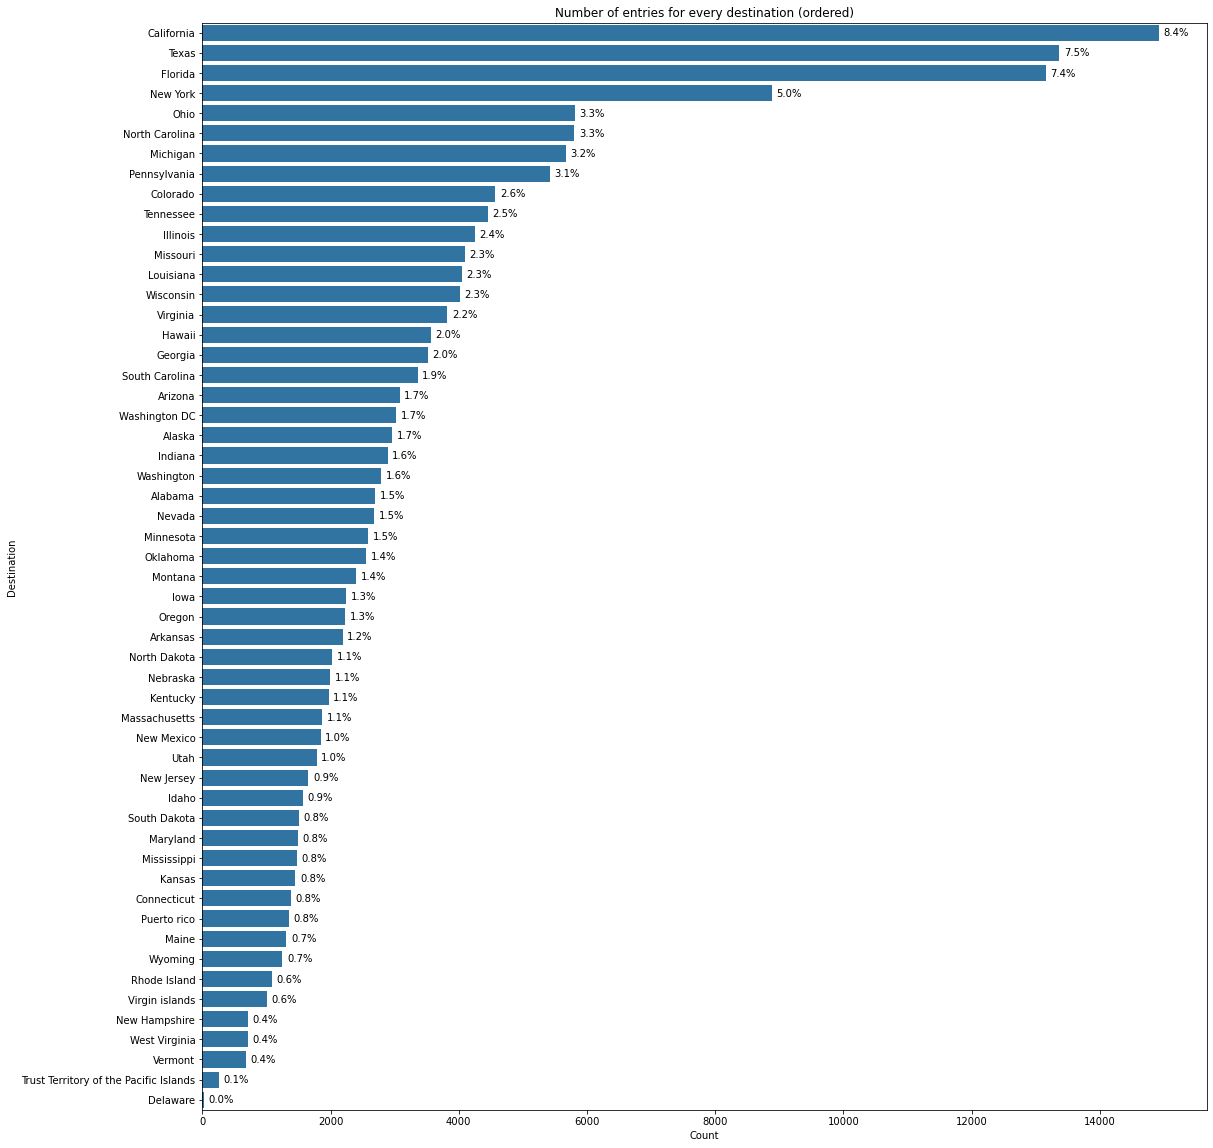

In [42]:
plt.figure(figsize = [18, 20]) 
sb.countplot(data=df, y='destination_name', color=base_color, order=destination_order)

for i in range (destination_counts.shape[0]):
    count = destination_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_destinations)
    plt.text(count+70, i, pct_string, va='center')

plt.ylabel('Destination')
plt.xlabel('Count')
plt.title('Number of entries for every destination (ordered)');

As can be seen from the graph above, the entries distribution among destination is very uneven. It could be argued that the flight destinations are distributed as follows: more known states such as California, Texas and Florida have high volumes of flights while lesser-known states like Maine or Vermont have considerably smaller volumes of flights. California is the most common destination within this dataset as 8.4% of all entries contain flights that have destinations somewhere within California. In contrast, there is a significant number of destinations that account for less than 1% of entries in the data set, like Vermont and Delaware.

#### 4.3.4 Carrier

In [43]:
df.carrier_name.value_counts()

SkyWest Airlines Inc.           24671
Delta Air Lines Inc.            17834
ExpressJet Airlines Inc.        15861
American Airlines Inc.          11747
United Air Lines Inc.           11251
Southwest Airlines Co.          10989
Frontier Airlines Inc.           8465
Alaska Airlines Inc.             8093
JetBlue Airways                  7699
Mesa Airlines Inc.               7686
Envoy Air                        7614
American Eagle Airlines Inc.     6707
US Airways Inc.                  5005
Endeavor Air Inc.                4411
Allegiant Air                    4406
PSA Airlines Inc.                3379
Republic Airline                 3173
AirTran Airways Corporation      3084
Spirit Air Lines                 2952
Atlantic Southeast Airlines      2792
Pinnacle Airlines Inc.           2305
Hawaiian Airlines Inc.           2181
ExpressJet Airlines LLC          1436
Virgin America                   1428
Continental Air Lines Inc.       1348
Comair Inc.                       918
Horizon Air 

In [44]:
carrier_counts = df['carrier_name'].value_counts()
n_carriers = df['carrier_name'].value_counts().sum()
carrier_order = df['carrier_name'].value_counts().index

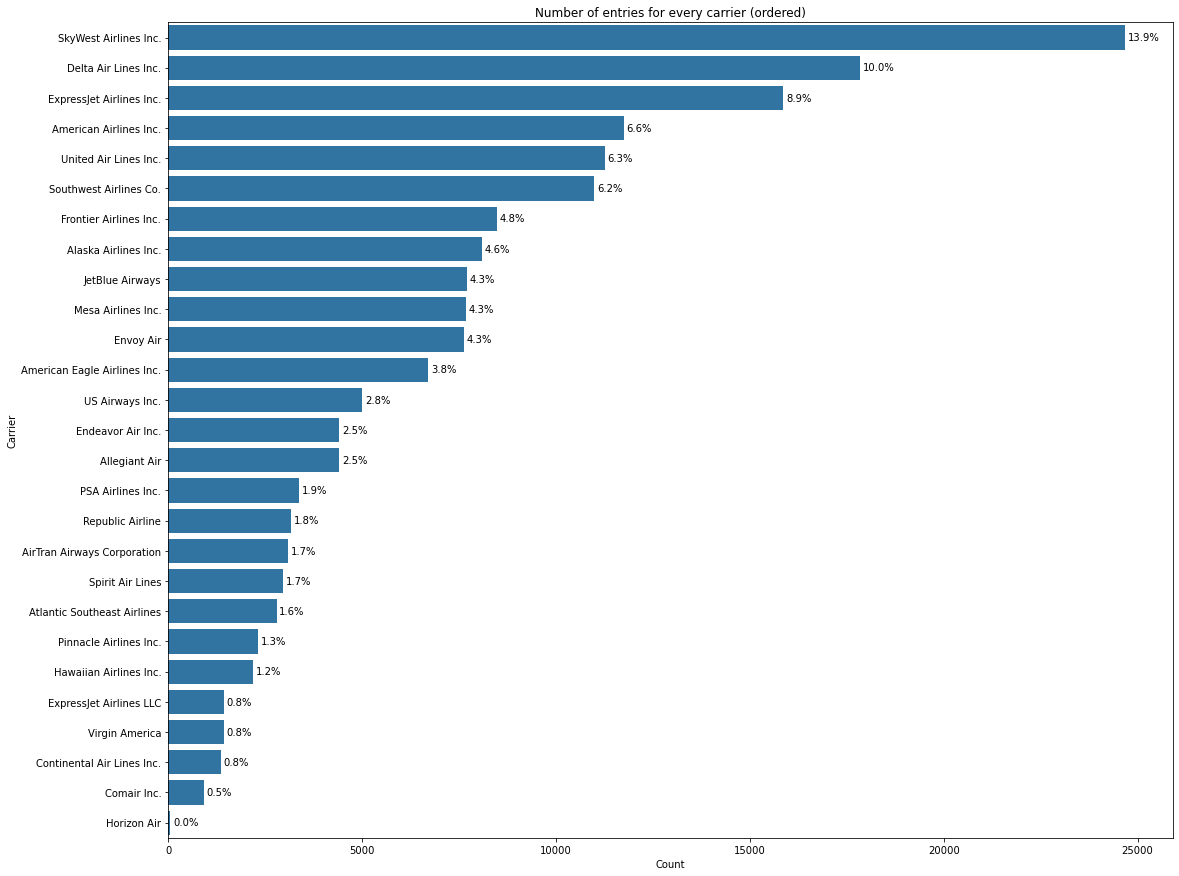

In [45]:
plt.figure(figsize = [18, 15]) 
sb.countplot(data=df, y='carrier_name', color=base_color, order=carrier_order)

for i in range (carrier_counts.shape[0]):
    count = carrier_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_carriers)
    plt.text(count+70, i, pct_string, va='center')

plt.ylabel('Carrier')
plt.xlabel('Count')
plt.title('Number of entries for every carrier (ordered)');

Carrier distribution is similarly uneven to destination distribution. SkyWest Airlines have the most entries in this dataset, with 13.9% of all entries referencing this carrier. Other famous carriers like Delta Airlines, American Airlines, United Airlines and Southwest Airlines are all among the most popular carriers in this dataset. There is a significant preference for these airlines in the dataset as the number of entries for those airlines is almost double the entries for less popular airlines like Hawaiian airlines or Pinnacle airlines.

<a id='4.4.'></a>
### 4.4. Main causes of delay
This section is dedicated to the secondary objective of finding out how the most common delay causes are distributed. Separate columns for the biggest cause of delay and the cause resulting in the biggest minutes of delay were created and were stored as `biggest_delay_cause` and `biggest_mins_delay` columns, respectively. The data in these columns will be visualised in this section.

In [46]:
df.biggest_delay_cause.value_counts()

Weather          100605
NAS               59100
Late Aircraft      4587
Security           3420
Carrier            3336
Name: biggest_delay_cause, dtype: int64

In [47]:
df['biggest_delay_cause'].unique()

array(['NAS', 'Weather', 'Security', nan, 'Carrier', 'Late Aircraft'],
      dtype=object)

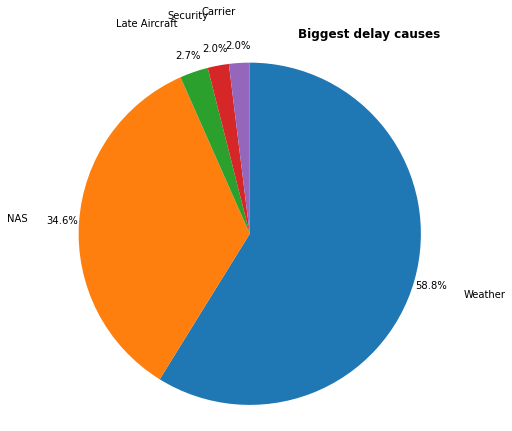

In [48]:
plt.figure(figsize = [8, 7])
biggest_cause_count = df['biggest_delay_cause'].value_counts()

plt.pie(biggest_cause_count, labels = biggest_cause_count.index, startangle = 90, counterclock = False, 
        autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.3);

plt.axis('square')
plt.title('Biggest delay causes', fontweight='bold', loc='right');

In [49]:
df.biggest_mins_delay.value_counts()

Weather          100623
NAS               59096
Late Aircraft      4575
Security           3419
Carrier            3335
Name: biggest_mins_delay, dtype: int64

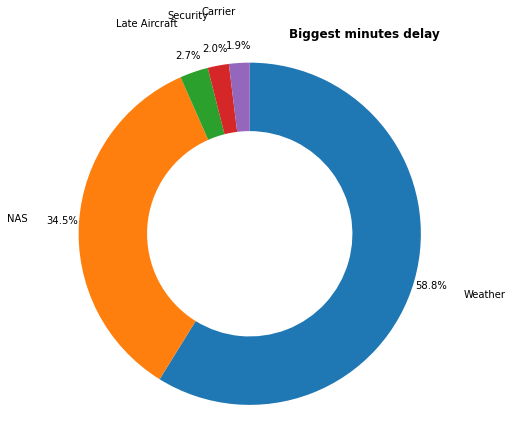

In [50]:
plt.figure(figsize = [8, 7]) 
biggest_mins_counts = df['biggest_mins_delay'].value_counts()

plt.pie(biggest_mins_counts, labels = biggest_mins_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.3);
plt.axis('square')
plt.title('Biggest minutes delay', fontweight='bold', loc='right');

As can be seen from both pie charts above, the distribution of the biggest delay cause in the entries is almost identical to the distribution of the biggest minutes delay cause. Furthermore, it is clear that the most common dominant cause of delays among all the entries in this dataset is the weather. 58.8% of all entries cite weather as the biggest cause of delay and the total minutes delay. National Aviation System comes in second and is the biggest cause in about a 3rd of all entries. Lastly, the late aircraft, security, and carrier causes are hardly ever the biggest cause of delay as each of the causes is cited as dominant only in 2-3% of all entries.

<a id='4.5.'></a>
### 4.5. Univariate Exploration Summary

#### Main variable insights (*Total minutes delay*)
* Total minutes delay in the dataset takes on a very large range of values, where the vast majority of the entries are distributed between 0 and 100k total minutes delay. 
* Most entries have less than 10k total delayed minutes; however, some entries have even more than 400k total delayed minutes. 
* Interestingly, despite the mentioned skewness, the log scale graph shows that the data resembles a normal distribution.

#### Numeric variables insights

*Total Number of Flights*
* The majority of the entries had between 10 and 1k total arriving flights.
* The log scale graph included three noteable spikes. However if these spikes are ignored, it could be said that the distribution resembles a normal distribution.

*Number of delayed flights*
* Most of the entries for total delayed flights fall between 10 and 500 flights.
* The log scale plot also shows that there are a significant amount of entries having less than 10 delayed flights on the left tail of the graph. Thus, the variable does not look like it follows a normal distribution when compared to the other two numeric variables.

*Main & numeric variables*
* It could be stated that the three numeric variables have somewhat similar distributions.
* The skewness in all three variables could be explained by the presence of very popular airports in the dataset. The likes of airports in New York or Washington DC will have significantly more flights per entry than the less popular airports in the Virgin Islands, for example. Hence, the observed skewness of the data is normal.

#### Categorical variables insights

*Year*
* The dataset contains entries for 12 different years.
* 2021 accounts for 0.9% of all entries and is the year with the least amount of entries.
* 2019 has the highest amount of entries accounting for 11.8% of the whole dataset.
* Despite the pandemic, 2020 has the third-highest amount of entries accounting for 10.6% of all dataset.

*Month*
* Every month has more than 14,000 entries, and overall, with the exception of January, every month is 8.3% of the whole dataset. 
* January has around 1k more entries than the rest of the months. This is due to the dataset containing only January data for 2021, with no entries for other months in 2021.

*Destination*
* The entries distribution among destination is very uneven.
* California is the most common destination within this dataset as 8.4% of all entries contain flights that have destinations somewhere within California.
* In contrast, there is a significant number of destinations that account for less than 1% of entries in the dataset, like Vermont and Delaware.

*Carrier*
* The entries distribution among carriers is very uneven.
* SkyWest Airlines have the most entries, with 13.9% of all entries referencing this carrier.
* Other famous carriers like Delta Airlines, American Airlines, United Airlines and Southwest Airlines are all among the most popular carriers, with the number of entries for those airlines being almost double the entries for less popular airlines like Hawaiian airlines or pinnacle airlines.


#### Main causes of delay insights
* The distribution of the biggest delay cause in the entries is almost identical to the distribution of the biggest minutes delay cause.
* Most common dominant cause of delays among all the entries in this dataset is the weather (58% of all entries).
* National Aviation System is the second biggest cause (34.5% of all entries).
* Late aircraft, security, and carrier causes are rarely the biggest delay causes, and each is only cited as dominant in 2-3% of all entries.

<a id='5.'></a>
## 5. Bivariate Exploration
This section provides bivariate visualisations for the variables of interest outlined in section 3.

In [51]:
numeric_vars = ['total_mins_delay', 'total_flights', 'num_delayed_flights']
categoric_vars = ['year', 'month', 'destination_name', 'carrier_name']

<a id='5.1.'></a>
### 5.1. Relationships between numeric variables

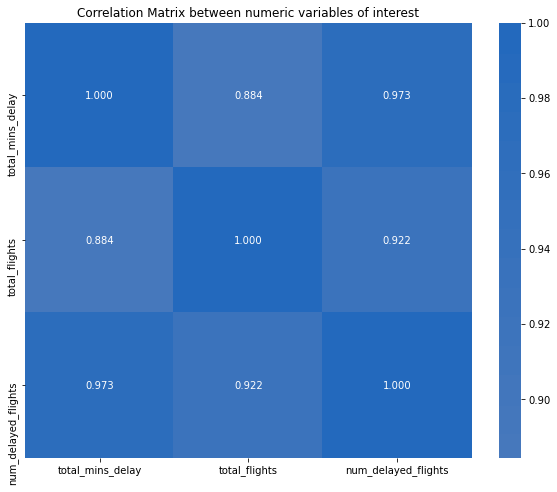

In [52]:
plt.figure(figsize = [10, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix between numeric variables of interest');

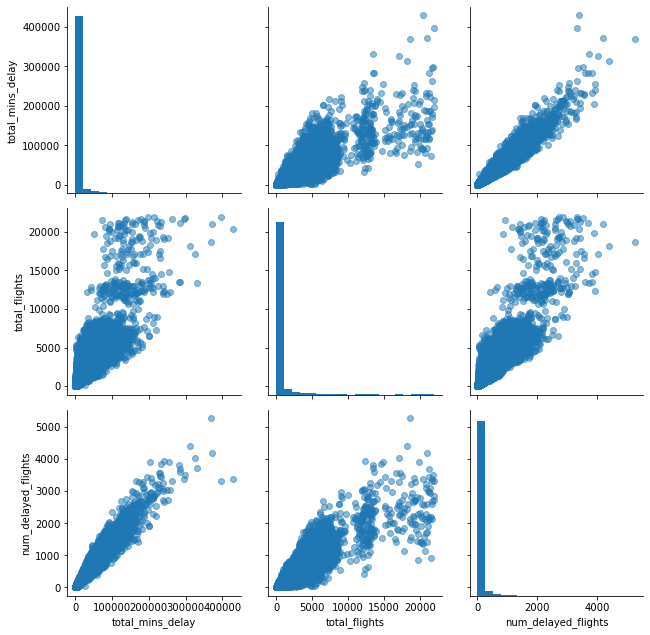

In [53]:
g = sb.PairGrid(data = df, vars = numeric_vars, height=3, aspect=1)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha=0.5);

As can be seen from the correlation matrix and the plots above, all chosen numeric variables are highly correlated with each other, where the lowest correlation between the three variables is 0.884. As previously mentioned, this is to be expected as the total minutes delay is likely to depend on how many flights are delayed. Similarly, the number of flights delayed is likely to depend on how many flights there were originally.

<a id='5.2.'></a>
### 5.2 Relationships between categorical variables

In [54]:
# setting an order for the month column to have consisntency in plots
df.month = pd.Categorical(df.month, categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                'July','August', 'September', 'October', 'November', 'December'], 
                          ordered=True)

Unfortunately, for both destinations and carriers, there are too many unique values to properly visualise in clustered bar charts. Therefore, only the top 10 most popular destinations and the top 10 most popular carriers will be used for the visualisations in this section.

In [55]:
# creating a dataframe with entries for only the top 10 destinations
df_10_destination = df[df['destination_name'].isin(list(df.destination_name.value_counts()[:10].index))]

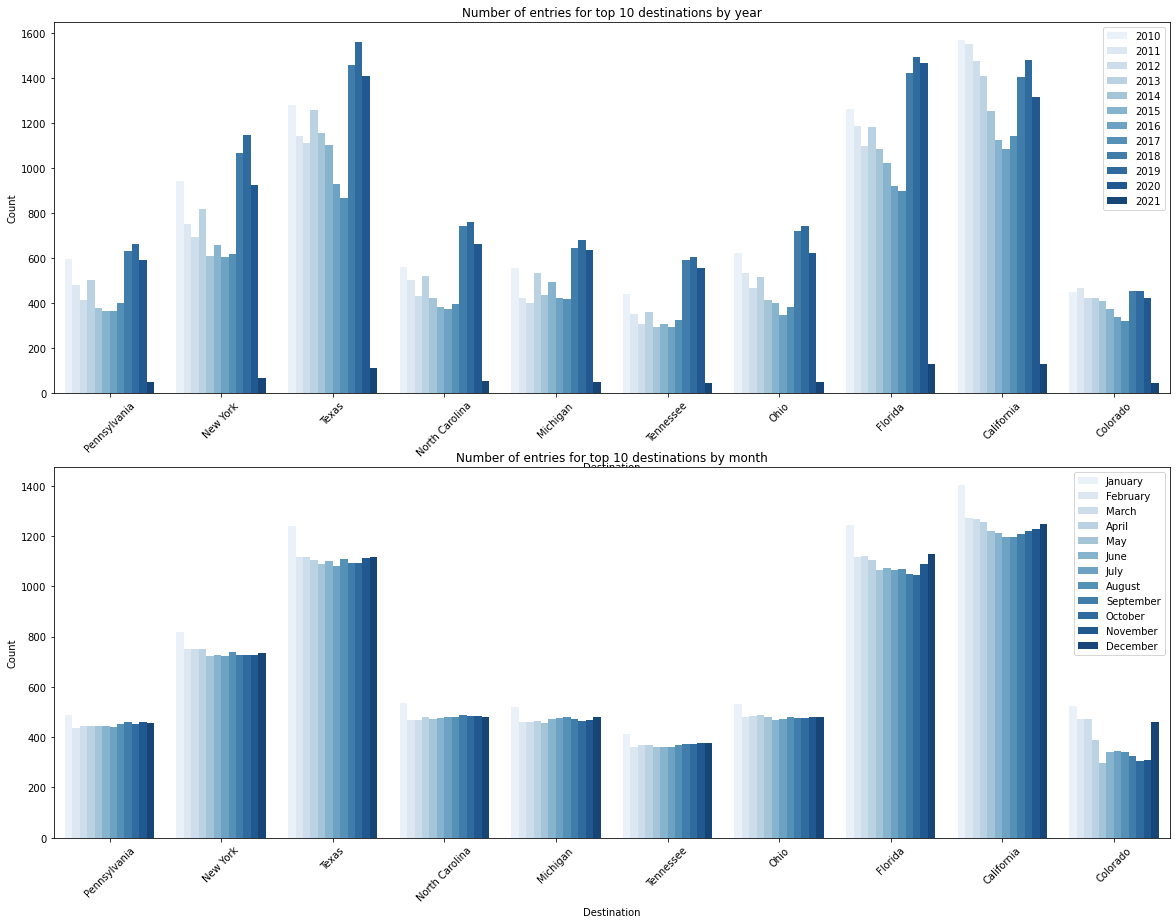

In [56]:
plt.figure(figsize = [20, 15])

# subplot 1: destination & year
ax = plt.subplot(2, 1, 1)
sb.countplot(data = df_10_destination, x = 'destination_name', hue = 'year', palette = 'Blues')
ax.legend(loc = 1)
plt.xticks(rotation=45) 
plt.ylabel('Count')
plt.xlabel('Destination')
plt.title('Number of entries for top 10 destinations by year')

# subplot 2: destination & month
ax = plt.subplot(2, 1, 2)
sb.countplot(data = df_10_destination, x = 'destination_name', hue = 'month', palette = 'Blues')
ax.legend(loc = 1)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Destination')
plt.title('Number of entries for top 10 destinations by month')

plt.show()

The bivariate visualisations above are consistent with the respective univariate visualisations. Firstly, almost all top 10 destinations have the most entries in 2018, 2019 or 2020, which were the years with the most entries. However, interestingly, the most popular destination overall, California, has the majority of its entries in 2010, 2011 and 2012 years instead. Nevertheless, while the 2021 entry could be ignored, all the top 10 entries have the least amount of entries in 2016 or 2017, which were the years with the lowest amount of entries overall.

Once again, all top 10 destinations have the most entries for January, but this could be ignored due to the issue outlined in the previous section. Moreover, just as the overall entry distribution among months, the entry distribution among months for the top 10 destinations is relatively identical with less than 100 entries difference between the months.

In [57]:
# creating a dataframe with entries for only the top 10 carriers
df_10_carrier = df[df['carrier_name'].isin(list(df.carrier_name.value_counts()[:10].index))]

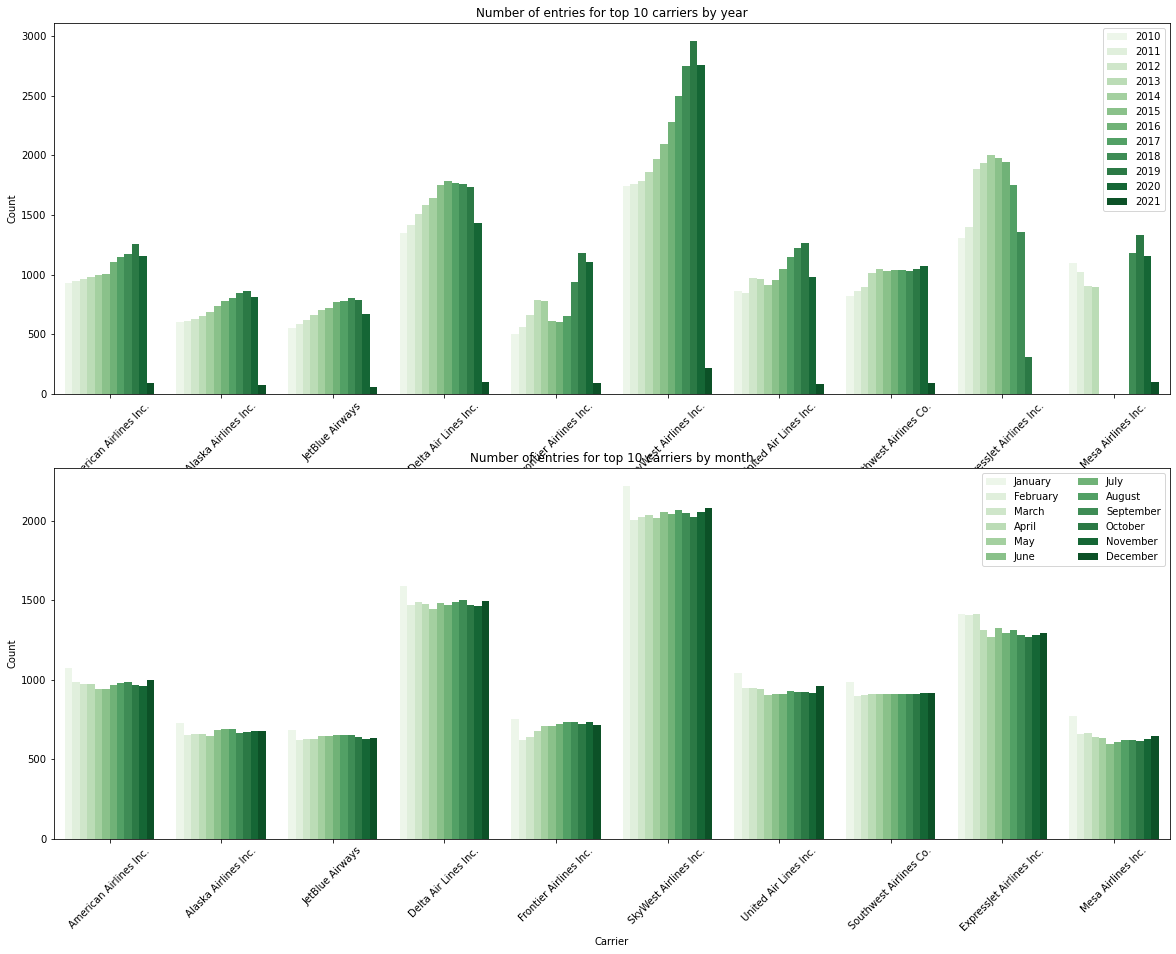

In [58]:
plt.figure(figsize = [20, 15])

# subplot 1: carrier & year
ax = plt.subplot(2, 1, 1)
sb.countplot(data = df_10_carrier, x = 'carrier_name', hue = 'year', palette = 'Greens')
ax.legend(loc = 1)
plt.xticks(rotation=45) 
plt.ylabel('Count')
plt.xlabel('Carrier')
plt.title('Number of entries for top 10 carriers by year')

# subplot 2: carrier & month
ax = plt.subplot(2, 1, 2)
sb.countplot(data = df_10_carrier, x = 'carrier_name', hue = 'month', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=45)  
plt.ylabel('Count')
plt.xlabel('Carrier')
plt.title('Number of entries for top 10 carriers by month')

plt.show()

As can be seen on the first graph, the number of entries for the majority of the top 10 carriers increased throughout the years between 2010 and 2020, most notably for the airline with the most entries overall, SkyWest Airlines. However, it is also apparent that the number of entries for each airline also fell slightly in 2020. Interestingly, Mesa Airlines is part of the top 10 airlines with the most entries, but it has no entries for the years 2014-2017. 

Lastly, as can be seen on the second graph, the distribution of entries for the top 10 airlines among different months is very similar to that of the top 10 destinations. That is, January has the highest number of entries, and entries are spread out almost perfectly evenly throughout the months.

In [59]:
df_destination_carrier = (df[df['destination_name'].isin(list(df.destination_name.value_counts()[:10].index)) & 
                          df['carrier_name'].isin(list(df.carrier_name.value_counts()[:10].index))])

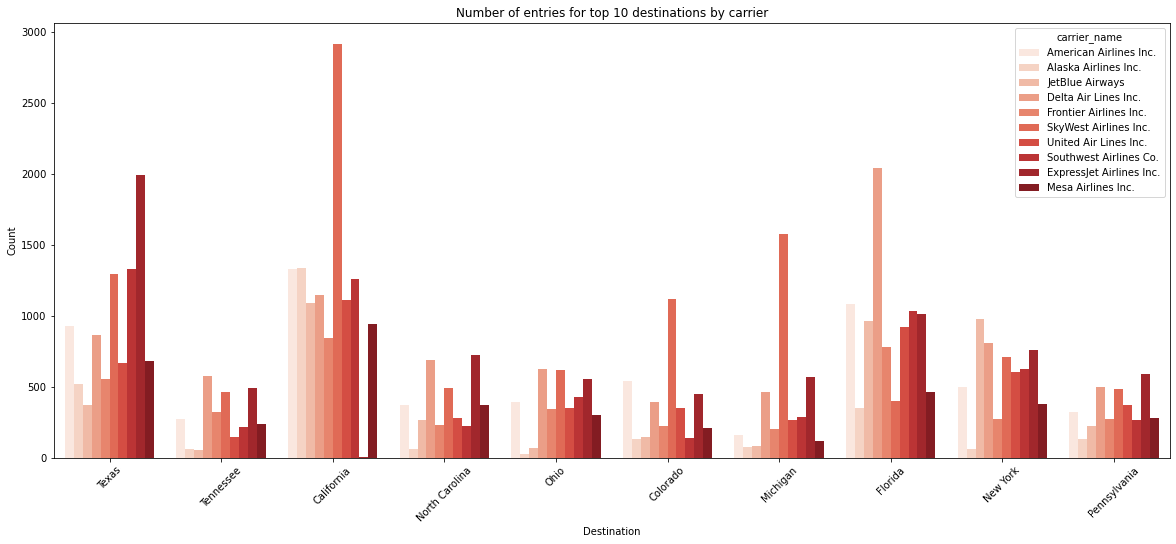

In [60]:
plt.figure(figsize = [20, 8])
sb.countplot(data = df_destination_carrier, x = 'destination_name', hue = 'carrier_name', palette = 'Reds')
ax.legend(loc = 5)
plt.xticks(rotation=45) 
plt.ylabel('Count')
plt.xlabel('Destination')
plt.title('Number of entries for top 10 destinations by carrier');

The graph above does not show a clear pattern in the number of entries between the top 10 destinations and top 10 carriers. Interestingly, almost every destination had a different dominant carrier. For instance, in California, it was SkyWest airlines, while in Texas, it was ExpressJet airlines. It is likely that this is observed due to specific carriers specialising in specific areas only.

<a id='5.3.'></a>
### 5.3. Relationship between numeric & categorical variables
Since a number of graphs will be generated at the same time, in this section, a 1,000 sample from the dataframe will be used in the first part of this section for clearer visualisation and faster graph generation.

In [61]:
# creating a dataframe with 1,000 random samples
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

In [62]:
def boxgrid(x, y, **kwargs):
    """ Function for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

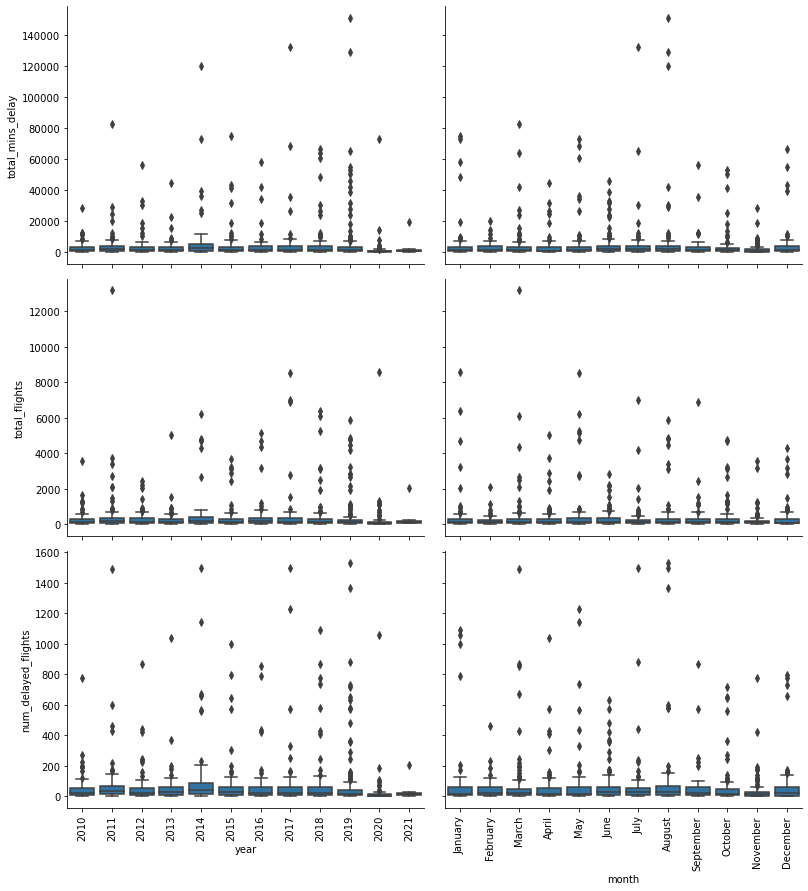

In [63]:
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars, x_vars = categoric_vars[:2],
                size = 4, aspect = 1.4)

for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

g.map(boxgrid)
plt.show();

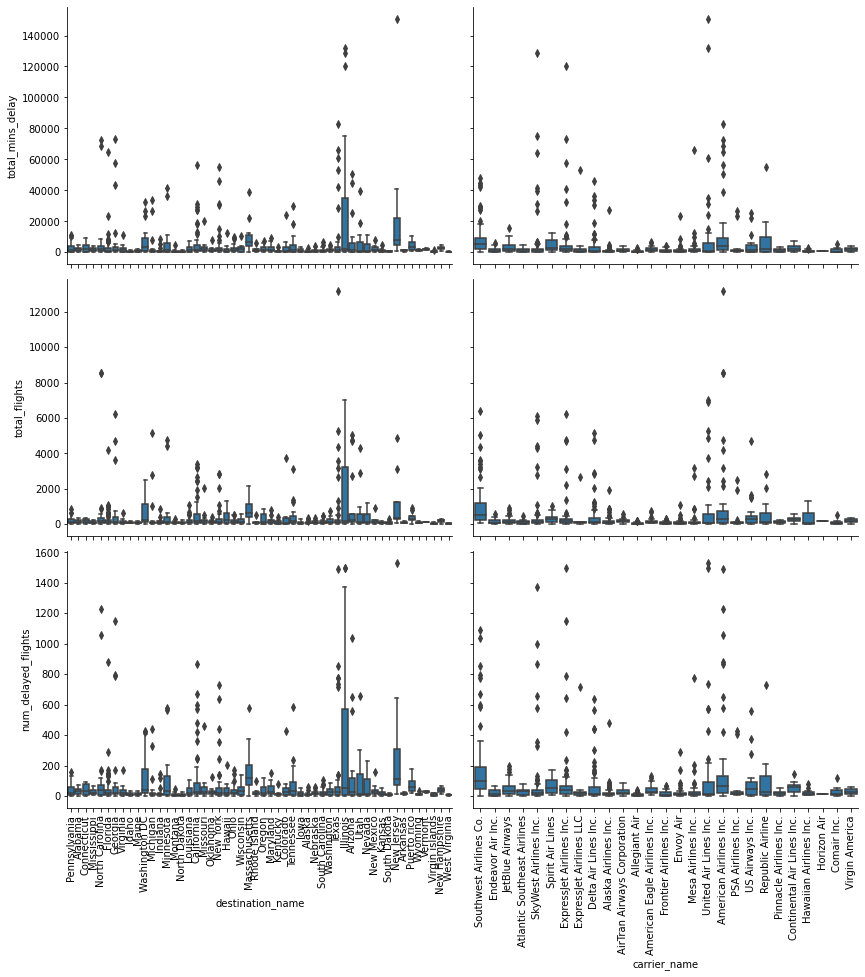

In [64]:
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars, x_vars = categoric_vars[2:],
                size = 4, aspect = 1.5)

for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

g.map(boxgrid)
plt.show();

The 12 box plots above show that there are significant upper outliers for all the variables. In order to visualise this better, a violin plot will be used with a log scale for the numeric variables.

In [65]:
def log_trans(x, inverse = False):
    """ Function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [66]:
numeric_vars = ['total_mins_delay', 'total_flights', 'num_delayed_flights']

for var in numeric_vars:
    df['log_'+var] = df[var].apply(log_trans)

In [67]:
# the null values will be dropped for the violin plot visualisation
df_violin = df.dropna(axis=0)

In [68]:
log_numeric_vars = ['log_total_mins_delay', 'log_total_flights', 'log_num_delayed_flights']

For every categorical variable, three violin plots will be created to visualise the relationship of each of the three numeric variables with that categorical variable.

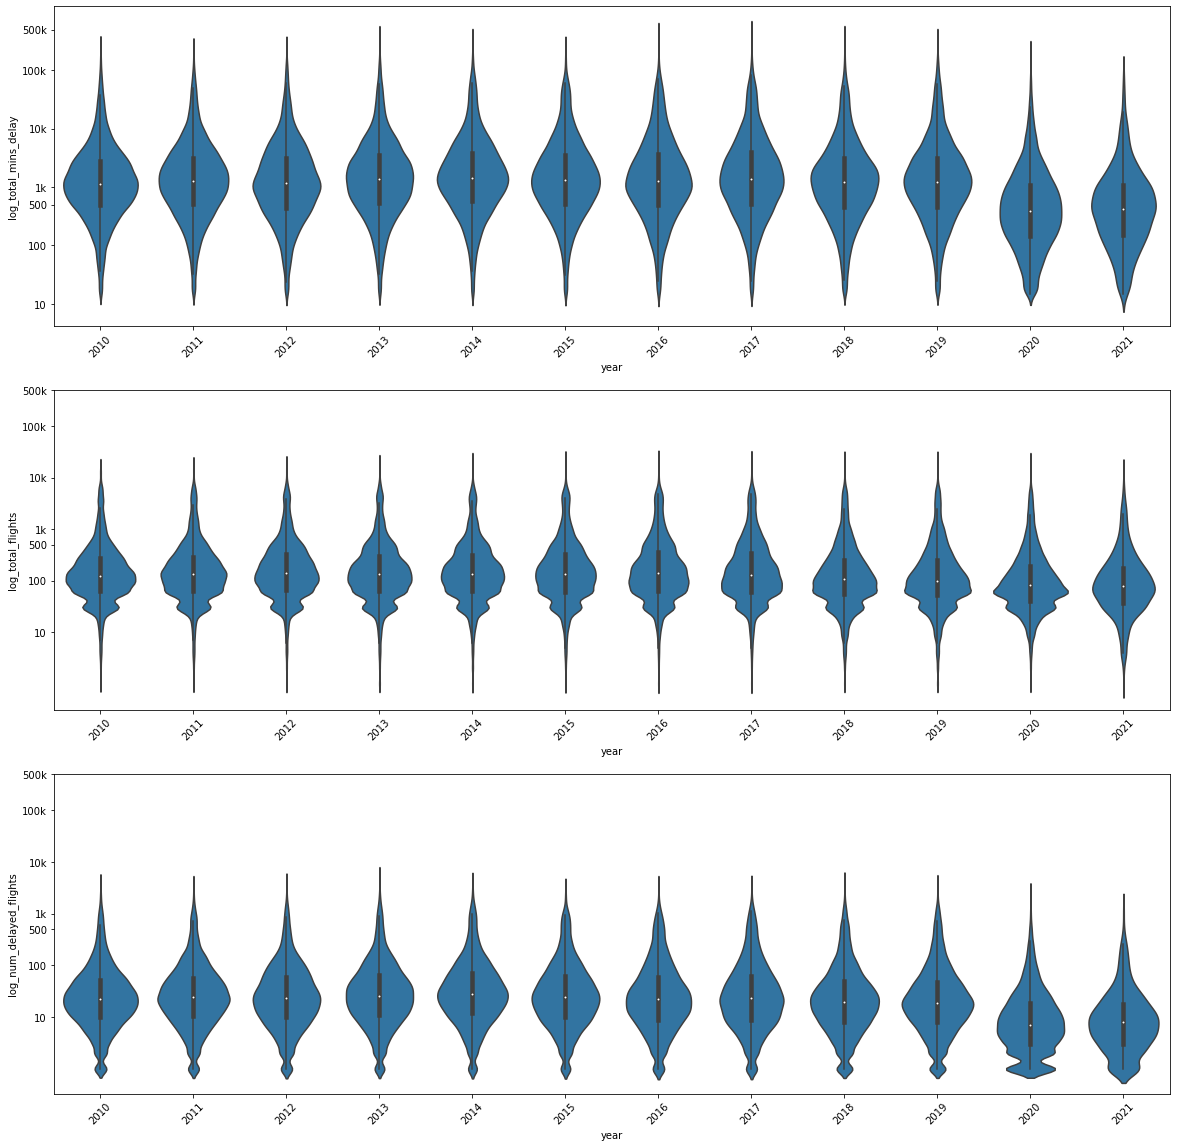

In [69]:
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = [20,20])

for i in range(len(log_numeric_vars)):
    var = log_numeric_vars[i]
    sb.violinplot(data = df_violin, x = 'year', y = var, ax = ax[i], 
                 color = base_color)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_yticks(log_trans(np.array([10, 10e1, 5e2, 10e2, 10e3, 10e4, 50e4])))
    ax[i].set_yticklabels([10, 100, 500, '1k','10k', '100k', '500k'])
    
plt.show()

The first violin plot shows the distribution of total minutes delayed throughout the years. The shape, median and the quartiles of total minutes delayed between the years 2010 to 2019 seem roughly the same. However, the total minutes delay drops significantly in 2020 and 2021. For both years, the median is about half of the median for the previous years. Interestingly, the number of total flights in those years did not decrease. The second violin plot shows that the total number of flights in those years has stayed relatively the same. Instead, the number of delayed flights has decreased in those years.

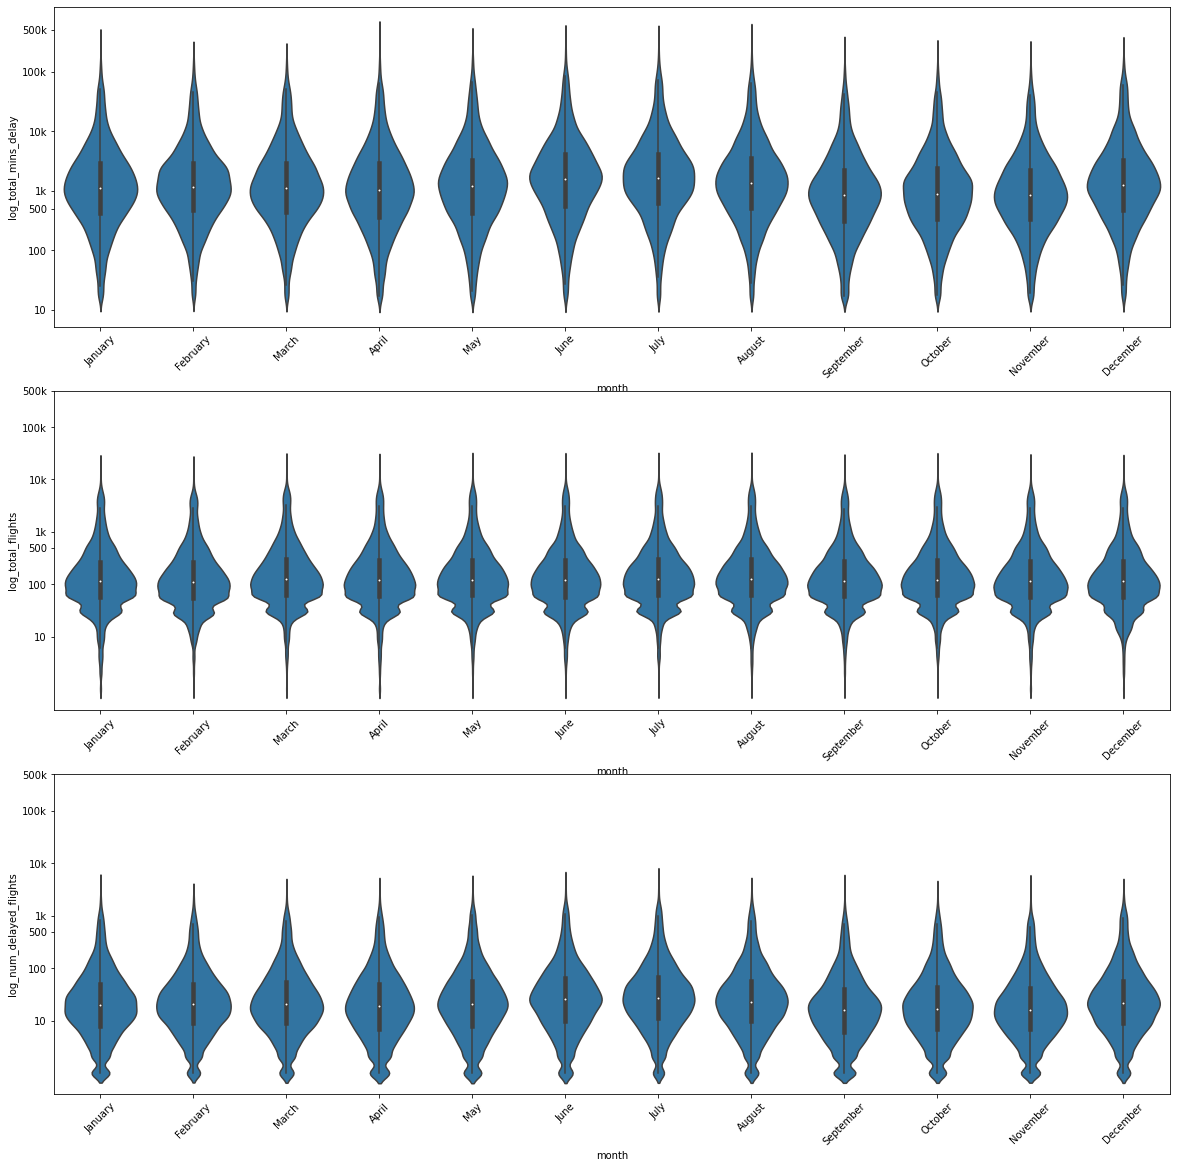

In [70]:
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = [20,20])

for i in range(len(log_numeric_vars)):
    var = log_numeric_vars[i]
    sb.violinplot(data = df_violin, x = 'month', y = var, ax = ax[i], 
                 color = base_color)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_yticks(log_trans(np.array([10, 10e1, 5e2, 10e2, 10e3, 10e4, 50e4])))
    ax[i].set_yticklabels([10, 100, 500, '1k','10k', '100k', '500k'])
    
plt.show()

As can be seen from the violin plot above, there are no significant differences in total minutes delay between the months. However, the median for total minutes delayed for December is slightly higher than for the rest of the months. Looking at the second plot, there is no such difference for the total flights. However, the third violin plot shows that the number of delayed flights also slightly increases in December.

In [71]:
# again only the top 10 destinations will be used
df_10_destination_violin = df_violin[df_violin['destination_name'].isin(
    list(df_violin.destination_name.value_counts()[:10].index))]

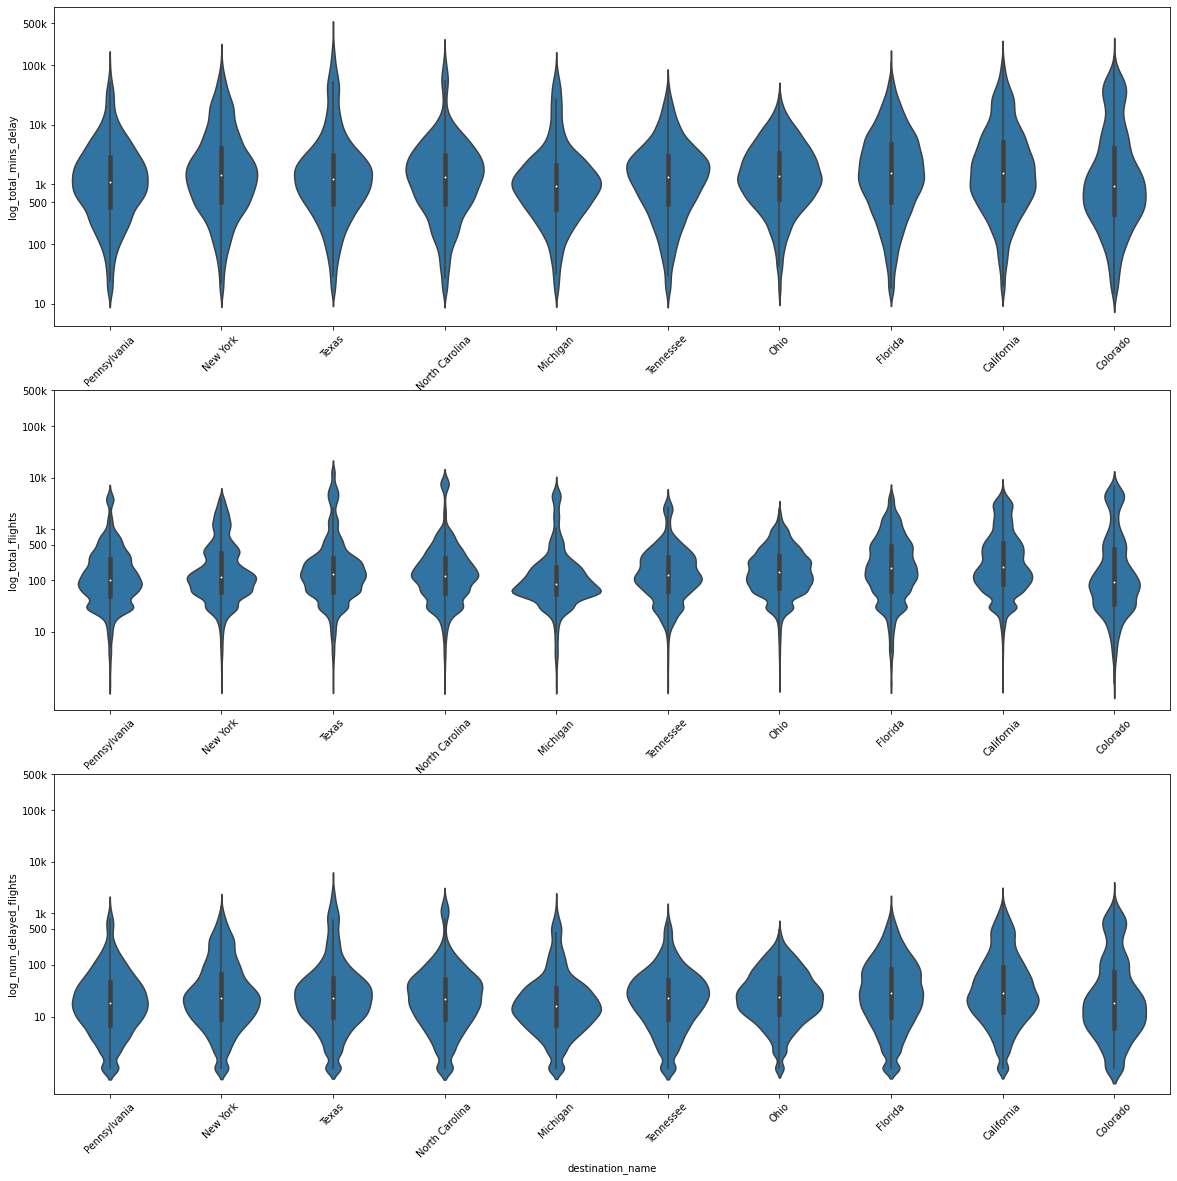

In [72]:
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = [20,20])

for i in range(len(log_numeric_vars)):
    var = log_numeric_vars[i]
    sb.violinplot(data = df_10_destination_violin, x = 'destination_name', y = var, ax = ax[i], 
                 color = base_color)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_yticks(log_trans(np.array([10, 10e1, 5e2, 10e2, 10e3, 10e4, 50e4])))
    ax[i].set_yticklabels([10, 100, 500, '1k','10k', '100k', '500k'])
    
plt.show()

The violin plots show that the total minutes delay have very varying distributions among the top 10 destinations. While the median seems to be roughly similar, the shape of the violin plot is vastly different from one destination to the next. The same could be said for the second and the third violin plots showing that total flights and the number of delayed flights is also vastly different among the top destinations.

In [73]:
# again only the top 10 carriers will be used
df_10_carrier_violin = df_violin[df_violin['carrier_name'].isin(
    list(df_violin.carrier_name.value_counts()[:10].index))]

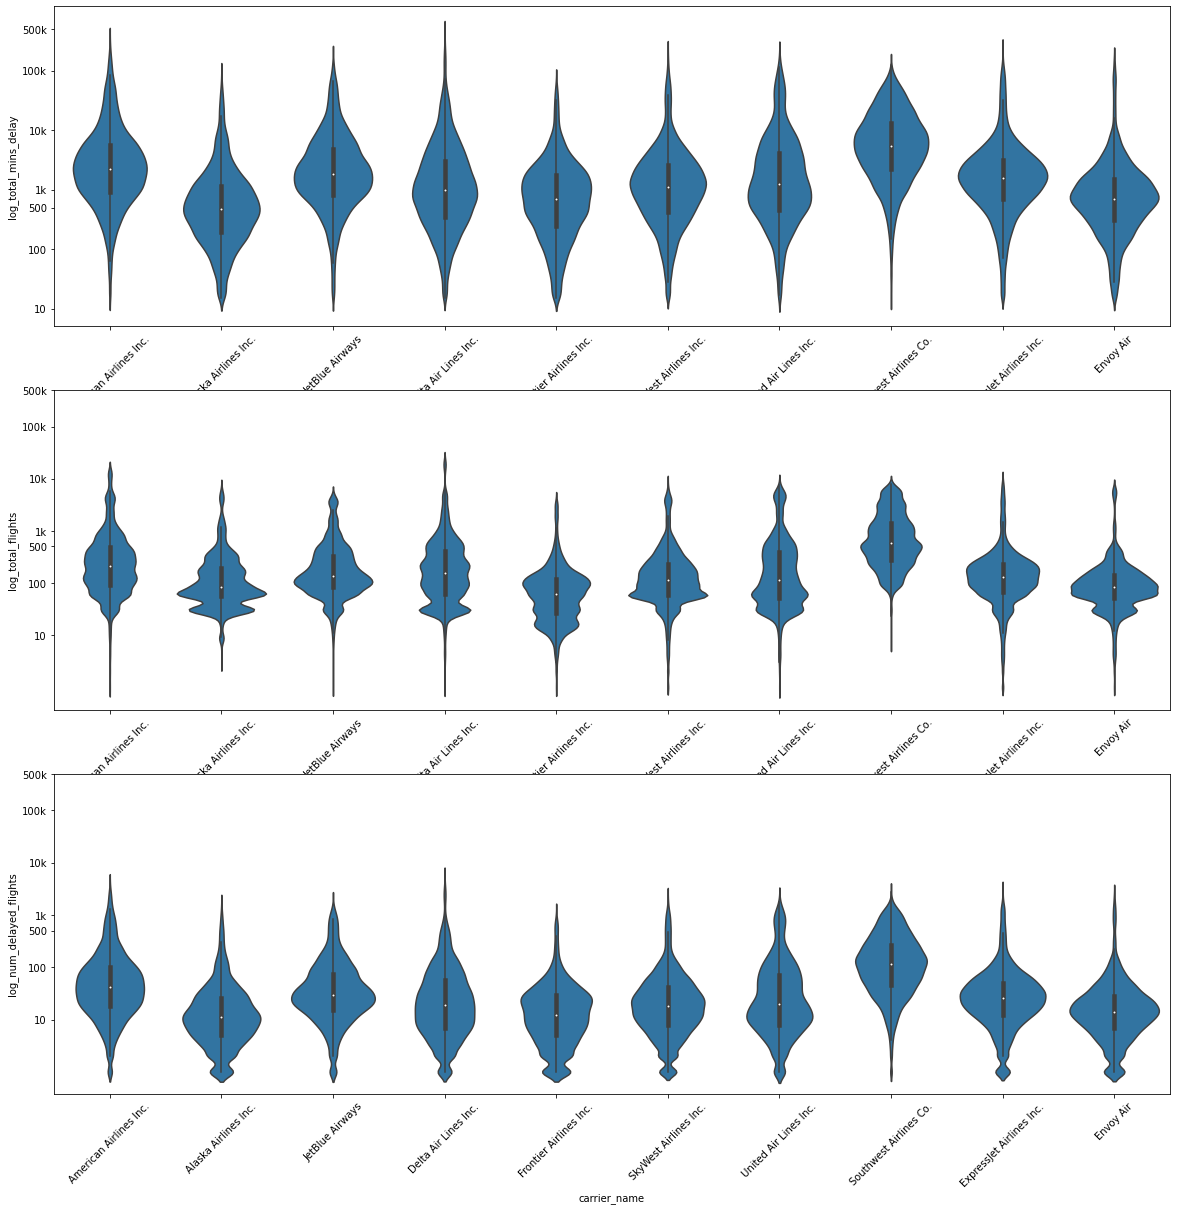

In [74]:
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = [20,20])

for i in range(len(log_numeric_vars)):
    var = log_numeric_vars[i]
    sb.violinplot(data = df_10_carrier_violin, x = 'carrier_name', y = var, ax = ax[i], 
                 color = base_color)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_yticks(log_trans(np.array([10, 10e1, 5e2, 10e2, 10e3, 10e4, 50e4])))
    ax[i].set_yticklabels([10, 100, 500, '1k','10k', '100k', '500k'])
    
plt.show()

Similar to the total mins delay distribution among the top 10 destinations, the distribution of total mins delay among the top 10 carriers does not follow a pattern. However, unlike the plots for the top 10 destinations, there is a visibly significant difference in the total minutes delay median and quartiles for the top 10 carriers. The same could also be said for the violin plots for total flights and the number of delayed flights.

<a id='5.4.'></a>
### 5.4. Bivariate Exploration Summary

#### Relationships between numeric variables insights
* All three chosen numeric variables are highly correlated with each other, where the lowest correlation between the three variables is 0.884.

#### Relationships between categorical variables insights
* Most top 10 destinations have the most entries in 2018, 2019 or 2020, which were the years with the most entries overall. However, interestingly, the most popular destination overall, California, has the majority of its entries in 2010, 2011 and 2012 years instead.
* All the top 10 entries have the least amount of entries in 2016 or 2017, which were the years with the lowest amount of entries overall.
* Just as the overall entry distribution among months, the entry distribution among months for the top 10 destinations is relatively identical with less than 500 entries difference between the months.
* The number of entries for the majority of the top 10 carriers increased throughout the years between 2010 and 2020
* It is also apparent that the number of entries for each airline also fell slightly in 2020.
*  Mesa Airlines is part of the top 10 airlines with the most entries, but it has no entries for the years 2014-2017.
* The distribution of entries for the top 10 airlines among different months is very similar to that of the top 10 destinations.
* There is no clear pattern in the number of entries between the top 10 destinations and top 10 carriers. It is likely that this is due to specific carriers specialising in specific areas only.


#### Relationship between numeric & categorical variables insights
* The median and the quartiles of total minutes delayed between the years 2010 to 2019 seem roughly the same. However, the total minutes delay drops significantly in 2020 and 2021. Interestingly, the number of total flights in those years did not decrease.  Instead, the number of delayed flights has decreased in those years.
* There are no significant differences in total minutes delay between different months. However, the median for total minutes delayed for December is slightly higher than for the rest of the months. Again there is no distinct difference in the total flights in December; however, the number of delayed flights is also slightly higher for that month.
* Total minutes delay have very varying distributions among the top 10 destinations. While the median seems to be roughly similar, the shape of the violin plot is vastly different from one destination to the next. The same could be observed for the total flights and number of delayed flights distribution among the top 10 destinations.
* The distribution of total mins delay among the top 10 carriers does not follow a pattern.  However, unlike the plots for the top 10 destinations, there is a visibly significant difference in the total minutes delay median and quartiles for the top 10 carriers.

<a id='6.'></a>
## 6. Multivariate Exploration
This section will use visualisations that include more than two variables. It aims to answer the secondary objective of understanding how the total delayed minutes changed in 2020 due to the pandemic.

In [75]:
# creating a dataframe that only contains 2020 entries
df_2020 = df_destination_carrier[df_destination_carrier['year'] == 2020].dropna(axis=0)
# creating a dataframe that only contains 2019 entries (for comparison)
df_2019 = df_destination_carrier[df_destination_carrier['year'] == 2019].dropna(axis=0)

In [76]:
# setting an order for the destination_name column to have consisntency in plots
df_2020.destination_name = pd.Categorical(df_2020.destination_name, 
                                          categories=df_2020.destination_name.value_counts().index, ordered=True)
df_2019.destination_name = pd.Categorical(df_2019.destination_name, 
                                          categories=df_2020.destination_name.value_counts().index, ordered=True)

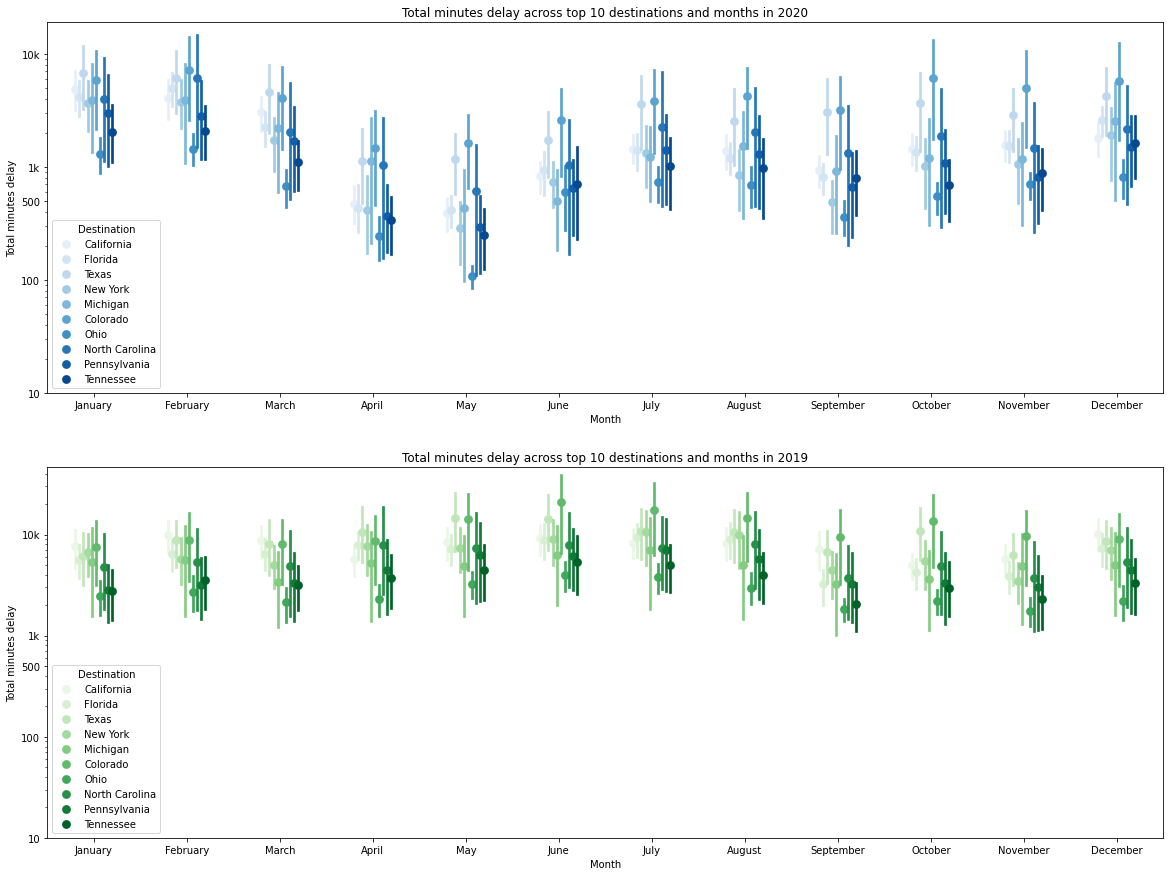

In [77]:
plt.figure(figsize = [20, 15])

ax = plt.subplot(2, 1, 1)
sb.pointplot(data = df_2020, x = 'month', y = 'total_mins_delay', 
                  hue = 'destination_name', palette = 'Blues', linestyles = '', dodge = 0.4)
plt.yscale('log')
plt.yticks([10, 10e1, 5e2, 10e2, 10e3], [10, 100, 500, '1k','10k'])
plt.title('Total minutes delay across top 10 destinations and months in 2020')
plt.ylabel('Total minutes delay')
plt.xlabel('Month')
plt.legend(title = 'Destination')
ax.set_yticklabels([],minor = True)


ax = plt.subplot(2, 1, 2)
sb.pointplot(data = df_2019, x = 'month', y = 'total_mins_delay', 
                  hue = 'destination_name', palette = 'Greens', linestyles = '', dodge = 0.4)
plt.yscale('log')
plt.yticks([10, 10e1, 5e2, 10e2, 10e3], [10, 100, 500, '1k','10k'])
plt.title('Total minutes delay across top 10 destinations and months in 2019')
plt.ylabel('Total minutes delay')
plt.xlabel('Month')
plt.legend(title = 'Destination')
ax.set_yticklabels([],minor = True)
plt.show();

The figures above show the difference in total minutes delay between 2020 and 2019. It is evident that in both years distribution of total minutes delay varies among the top 10 destinations. However, in 2020 the range of total minutes delay for all months is significantly higher than in 2019 for all months. Similarly, in 2019 the total minutes delay for all top 10 destinations seems to be relatively the same throughout the 12 months. However, there are larger ranges of total minutes dealy for certain destinations during May and the summer months, but these differences are not observed for all destinations. In contrast, in 2020, the months of April, May and June have significantly smaller total minutes delay for all destinations. Lockdown enforcement is a possible cause for this as, during the lockdown, there were fewer flights, and therefore, it is likely that fewer flights got delayed. Additionally, the rages of total minutes delay for all destinations in 2020 are significantly higher than those observed for 2019.

In [78]:
# setting an order for the carrier_name column to have consisntency in plots
df_2020.carrier_name = pd.Categorical(df_2020.carrier_name, 
                                      categories=df_2020.carrier_name.value_counts().index, ordered=True)
df_2019.carrier_name = pd.Categorical(df_2019.carrier_name, 
                                      categories=df_2020.carrier_name.value_counts().index, ordered=True)

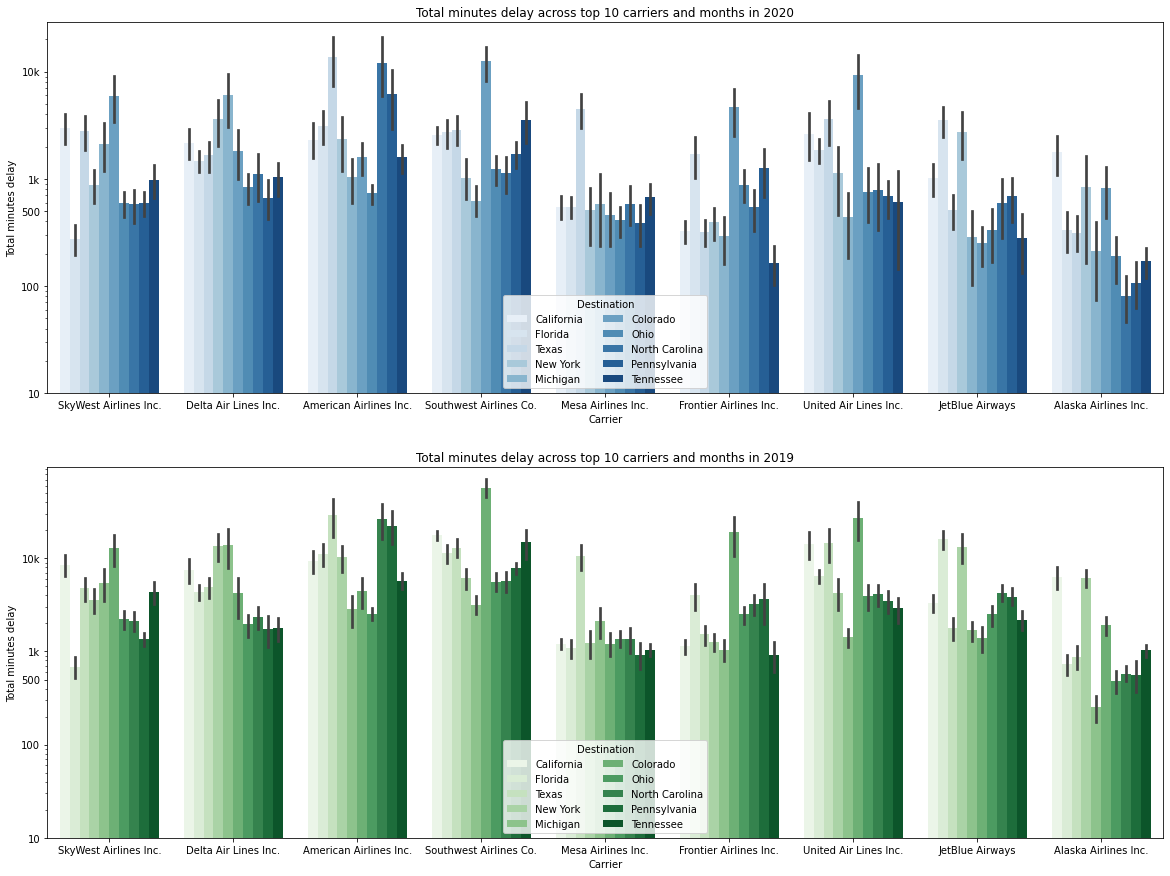

In [79]:
plt.figure(figsize = [20, 15])

ax = plt.subplot(2, 1, 1)
sb.barplot(data = df_2020, x = 'carrier_name', y = 'total_mins_delay', hue = 'destination_name', 
                palette = 'Blues')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')
plt.yscale('log')
plt.yticks([10, 10e1, 5e2, 10e2, 10e3], [10, 100, 500, '1k','10k'])
plt.title('Total minutes delay across top 10 carriers and months in 2020')
plt.ylabel('Total minutes delay')
plt.xlabel('Carrier')
plt.legend(title = 'Destination', loc=8, ncol=2);

ax = plt.subplot(2, 1, 2)
sb.barplot(data = df_2019, x = 'carrier_name', y = 'total_mins_delay', hue = 'destination_name', 
                palette = 'Greens')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')
plt.yscale('log')
plt.yticks([10, 10e1, 5e2, 10e2, 10e3], [10, 100, 500, '1k','10k'])
plt.title('Total minutes delay across top 10 carriers and months in 2019')
plt.ylabel('Total minutes delay')
plt.xlabel('Carrier')
plt.legend(title = 'Destination', loc=8, ncol=2);

As the graphs above illustrate, there is not much difference between 2019 and 2020 with the chosen parameters of destination and top 10 carriers. However, overall, the total minutes delay was higher in 2019 than in 2020.